In [196]:
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
import numpy as np
pd.set_option("display.max_columns", None)

In [197]:
df = pd.read_csv("Dataset/the_emmy_awards.csv") # dataset de kaggle

In [198]:
df # junto este df con el mío 

,id,year,category,nominee,staff,company,producer,win
0,1,2019,Outstanding Character Voice-Over Performance,The Simpsons,"Hank Azaria, as Moe, Carl, Duffman, Kirk",FOX,Gracie Films in association with 20th Century ...,False
1,2,2019,Outstanding Character Voice-Over Performance,Family Guy,"Alex Borstein, as Lois Griffin, Tricia Takanawa",FOX,20th Century Fox Television,False
2,3,2019,Outstanding Character Voice-Over Performance,When You Wish Upon A Pickle: A Sesame Street S...,"Eric Jacobson, as Bert, Grover, Oscar",HBO,Sesame Street Workshop,False
3,4,2019,Outstanding Character Voice-Over Performance,F Is For Family,"Kevin Michael Richardson, as Rosie",Netflix,Wild West Television in association with Gaumo...,False
4,5,2019,Outstanding Production Design For A Narrative ...,Escape At Dannemora,"Mark Ricker, Production Designer; James Truesd...",Showtime,"Red Hour, Busyhands, The White Mountain Compan...",False
...,...,...,...,...,...,...,...,...
21498,21499,1949,MOST POPULAR TELEVISION PROGRAM,Don Lee Music Hall,"n/a,",KTSL,NaN,False
21499,21500,1949,MOST POPULAR TELEVISION PROGRAM,Felix De Cola Show,"n/a,",KTLA,NaN,False
21500,21501,1949,SPECIAL AWARD,Louis McManus For His Original Design of the Emmy,"n/a,",NaN,NaN,True
21501,21502,1949,STATION AWARD,KTLA for Outstanding overall achievement in 1948,"n/a,",KTLA,NaN,True


In [199]:
nulls_data = []

# Iteramos sobre las columnas para calcular el porcentaje de valores nulos
for column in df.columns:
    null_percentage = df[column].isna().sum() / len(df[column])  # Calculamos el porcentaje de nulos
    nulls_data.append([column, null_percentage])  # Almacenamos el resultado

# Convertimos la lista en un DataFrame
nulls_df = pd.DataFrame(nulls_data, columns=['Columna', 'Porcentaje de Nulos'])


In [200]:
nulls_df

,Columna,Porcentaje de Nulos
0,id,0.000000
1,year,0.000000
2,category,0.000000
3,nominee,0.007255
4,staff,0.002697
5,company,0.016928
6,producer,0.631168
7,win,0.000000


In [201]:
# eliminamos los nulls de las series
df.dropna(subset= ["nominee"], inplace=True)

In [202]:
print(df["nominee"].isna().sum())  # Verificar nuevamente cuántos nulos quedan en la columna "nominee"


0


In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21347 entries, 0 to 21502
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        21347 non-null  int64 
 1   year      21347 non-null  int64 
 2   category  21347 non-null  object
 3   nominee   21347 non-null  object
 4   staff     21289 non-null  object
 5   company   20983 non-null  object
 6   producer  7931 non-null   object
 7   win       21347 non-null  bool  
dtypes: bool(1), int64(2), object(5)
memory usage: 1.3+ MB


In [204]:
df["Title"] = df["nominee"].str.lower().str.strip()

In [205]:
df

,id,year,category,nominee,staff,company,producer,win,Title
0,1,2019,Outstanding Character Voice-Over Performance,The Simpsons,"Hank Azaria, as Moe, Carl, Duffman, Kirk",FOX,Gracie Films in association with 20th Century ...,False,the simpsons
1,2,2019,Outstanding Character Voice-Over Performance,Family Guy,"Alex Borstein, as Lois Griffin, Tricia Takanawa",FOX,20th Century Fox Television,False,family guy
2,3,2019,Outstanding Character Voice-Over Performance,When You Wish Upon A Pickle: A Sesame Street S...,"Eric Jacobson, as Bert, Grover, Oscar",HBO,Sesame Street Workshop,False,when you wish upon a pickle: a sesame street s...
3,4,2019,Outstanding Character Voice-Over Performance,F Is For Family,"Kevin Michael Richardson, as Rosie",Netflix,Wild West Television in association with Gaumo...,False,f is for family
4,5,2019,Outstanding Production Design For A Narrative ...,Escape At Dannemora,"Mark Ricker, Production Designer; James Truesd...",Showtime,"Red Hour, Busyhands, The White Mountain Compan...",False,escape at dannemora
...,...,...,...,...,...,...,...,...,...
21498,21499,1949,MOST POPULAR TELEVISION PROGRAM,Don Lee Music Hall,"n/a,",KTSL,NaN,False,don lee music hall
21499,21500,1949,MOST POPULAR TELEVISION PROGRAM,Felix De Cola Show,"n/a,",KTLA,NaN,False,felix de cola show
21500,21501,1949,SPECIAL AWARD,Louis McManus For His Original Design of the Emmy,"n/a,",NaN,NaN,True,louis mcmanus for his original design of the emmy
21501,21502,1949,STATION AWARD,KTLA for Outstanding overall achievement in 1948,"n/a,",KTLA,NaN,True,ktla for outstanding overall achievement in 1948


In [206]:
# añado una columna que es 1 si ha sido nominado y 0 si no ha sido nominada

In [207]:
df["nominada"]= 1

In [208]:
df

,id,year,category,nominee,staff,company,producer,win,Title,nominada
0,1,2019,Outstanding Character Voice-Over Performance,The Simpsons,"Hank Azaria, as Moe, Carl, Duffman, Kirk",FOX,Gracie Films in association with 20th Century ...,False,the simpsons,1
1,2,2019,Outstanding Character Voice-Over Performance,Family Guy,"Alex Borstein, as Lois Griffin, Tricia Takanawa",FOX,20th Century Fox Television,False,family guy,1
2,3,2019,Outstanding Character Voice-Over Performance,When You Wish Upon A Pickle: A Sesame Street S...,"Eric Jacobson, as Bert, Grover, Oscar",HBO,Sesame Street Workshop,False,when you wish upon a pickle: a sesame street s...,1
3,4,2019,Outstanding Character Voice-Over Performance,F Is For Family,"Kevin Michael Richardson, as Rosie",Netflix,Wild West Television in association with Gaumo...,False,f is for family,1
4,5,2019,Outstanding Production Design For A Narrative ...,Escape At Dannemora,"Mark Ricker, Production Designer; James Truesd...",Showtime,"Red Hour, Busyhands, The White Mountain Compan...",False,escape at dannemora,1
...,...,...,...,...,...,...,...,...,...,...
21498,21499,1949,MOST POPULAR TELEVISION PROGRAM,Don Lee Music Hall,"n/a,",KTSL,NaN,False,don lee music hall,1
21499,21500,1949,MOST POPULAR TELEVISION PROGRAM,Felix De Cola Show,"n/a,",KTLA,NaN,False,felix de cola show,1
21500,21501,1949,SPECIAL AWARD,Louis McManus For His Original Design of the Emmy,"n/a,",NaN,NaN,True,louis mcmanus for his original design of the emmy,1
21501,21502,1949,STATION AWARD,KTLA for Outstanding overall achievement in 1948,"n/a,",KTLA,NaN,True,ktla for outstanding overall achievement in 1948,1


In [209]:
df[df["nominee"]== "Arrested Development"]

,id,year,category,nominee,staff,company,producer,win,Title,nominada
3801,3802,2013,Outstanding Lead Actor In A Comedy Series,Arrested Development,"Jason Bateman, as Michael Bluth",Netflix,Produced by Imagine TV and 20th Century Fox Te...,False,arrested development,1
4119,4120,2013,Outstanding Music Composition For A Series (Or...,Arrested Development,"David Schwartz,",Netflix,Produced by Imagine TV and 20th Century Fox Te...,False,arrested development,1
4172,4173,2013,Outstanding Single-camera Picture Editing For ...,Arrested Development,"Kabir Akhtar, ; A.J. Dickerson,",Netflix,Produced by Imagine TV and 20th Century Fox Te...,False,arrested development,1
7438,7439,2006,Outstanding Supporting Actor In A Comedy Series,Arrested Development,"Will Arnett, as Gob Bluth",FOX,Produced by Imagine TV and 20th Century Fox Te...,False,arrested development,1
7449,7450,2006,Outstanding Writing for a Comedy Series,Arrested Development,"Richard Day, Story by; Mitchell Hurwitz, Story...",FOX,Produced by Imagine TV and 20th Century Fox Te...,False,arrested development,1
7460,7461,2006,Outstanding Comedy Series,Arrested Development,"John Amodeo, Supervising Producer; Richard Day...",FOX,Produced by Imagine TV and 20th Century Fox Te...,False,arrested development,1
7749,7750,2006,Outstanding Single-camera Picture Editing For ...,Arrested Development,"Stuart Bass, A.C.E.",FOX,Produced by Imagine TV and 20th Century Fox Te...,False,arrested development,1
7890,7891,2005,Outstanding Lead Actor In A Comedy Series,Arrested Development,"Jason Bateman, as Michael Bluth",FOX,Produced by Imagine TV and 20th Century Fox Te...,False,arrested development,1
7896,7897,2005,Outstanding Supporting Actress In A Comedy Series,Arrested Development,"Jessica Walter, as Lucille Bluth",FOX,Produced by Imagine TV and 20th Century Fox Te...,False,arrested development,1
7902,7903,2005,Outstanding Supporting Actor In A Comedy Series,Arrested Development,"Jeffrey Tambor, as George Bluth Sr.",FOX,Produced by Imagine TV and 20th Century Fox Te...,False,arrested development,1


In [210]:
df[df["win"] == False]["company"].unique() # hay demasiados valores, no creo la vaya a usar

array(['FOX', 'HBO', 'Netflix', 'Showtime', 'BBC America', 'Prime Video',
       'NBC', 'truTV', 'CBS', 'ABC', 'FX Networks', 'Hulu', 'CNN', nan,
       'Pop TV', 'IFC', 'Comedy Central', 'VH1', 'Discovery Channel',
       'National Geographic', 'TBS', 'Cinemax', 'BET Networks', 'CW',
       'AMC', 'CBS (CBS All Access)', 'PBS', 'Acorn TV',
       'anemmyformegan.com', 'FunnyOrDie', 'YouTube', 'A&E', 'Lifetime',
       'Food Network', 'TLC', 'Bravo', 'YouTube Premium', 'NBC (YouTube)',
       'Vimeo', 'Windows Mixed Reality', 'HQ Trivia App', 'Adult Swim',
       'Nickelodeon', 'Cartoon Network', 'Disney Channel', 'ESPN',
       'Oculus', 'Disney XD', 'TNT', 'Starz',
       'Google Spotlight Stories App', 'PlayStation VR App', 'USA',
       'HISTORY', 'Paramount Network', 'Stage13.com', 'Facebook.com',
       'theaccidentalwolf.com', 'Nat Geo WILD', 'TOPIC.com',
       'ABC (abc.go.com)', 'AMC (amc.com)',
       'Comedy Central (thedailyshow.com)', 'NBC (nbc.com)',
       'Bravo (bravo

In [211]:
df["company"].nunique() # hay demasiados valores 243

243

In [212]:
# elimino las columnas que creo que no me harán falta
df.drop(columns = ["id", "year", "category", "nominee", "staff", "company", "producer"], inplace = True)

In [213]:
df["Title"].nunique() # hay 5546 series unicas / el df tiene 21347 filas (muchas series han ganados varias veces)

5546

In [214]:
df[df['win'] == True].groupby('Title').size().reset_index(name='Num_Wins').sort_values(by=["Num_Wins"], ascending=False)
# han ganado 2048 series

,Title,Num_Wins
1292,saturday night live,66
603,game of thrones,59
585,frasier,37
1791,the simpsons,31
1701,the mary tyler moore show,29
...,...,...
427,david copperfield - 15 years of magic,1
429,davis rules,1
1140,opening ceremony of the xvi pan american games...,1
1139,one last hug: three days at grief camp,1


In [215]:
df[df["Title"]== "game of thrones"][["Title", "win", "nominada"]]

,Title,win,nominada
8,game of thrones,False,1
38,game of thrones,False,1
69,game of thrones,False,1
70,game of thrones,False,1
71,game of thrones,False,1
...,...,...,...
5187,game of thrones,False,1
5239,game of thrones,False,1
5276,game of thrones,False,1
5322,game of thrones,False,1


In [216]:
df[(df["Title"]== "game of thrones")& (df["win"]==True)]

,win,Title,nominada
579,True,game of thrones,1
583,True,game of thrones,1
584,True,game of thrones,1
588,True,game of thrones,1
594,True,game of thrones,1
599,True,game of thrones,1
603,True,game of thrones,1
607,True,game of thrones,1
610,True,game of thrones,1
612,True,game of thrones,1


In [217]:
df[df["Title"]== "breaking bad"][["Title", "win"]]

,Title,win
3203,breaking bad,True
3209,breaking bad,True
3215,breaking bad,True
3233,breaking bad,True
3234,breaking bad,False
3239,breaking bad,False
3244,breaking bad,True
3398,breaking bad,False
3425,breaking bad,False
3495,breaking bad,False


In [218]:
# nos quedamos con la serie una sola vez, una columna que me diga si ha sido nominada y una columna que me dice si ha ganado y otra que me dice cuantos
# Filtramos las filas donde ha ganado un Emmy (win = True)
df_win= df[df["win"] == True]

# Contamos los Emmys ganados por cada serie (sin duplicados por año)
df_emmy_count = df_win.groupby("Title").size().reset_index(name="num_emmys")

# Hacemos el merge con el DataFrame original para agregar la cantidad total de Emmys por serie
df_final = pd.merge(df, df_emmy_count, on="Title", how="left")

# Si no ha ganado ningún Emmy, ponemos 0 en la columna "Cantidad_Emmys"
df_final["num_emmys"] = df_final["num_emmys"].fillna(0)

# Crear la columna "win" para indicar si la serie ha ganado un Emmy en algún año
df_final["win"] = df_final["num_emmys"] > 0

# resultado final sin duplicados
df_emmy = df_final[["Title","nominada", "win", "num_emmys"]].drop_duplicates()

In [219]:
df_emmy["Title"].nunique()

5546

In [220]:
df_emmy[df_emmy["Title"] == "breaking bad"]

,Title,nominada,win,num_emmys
3203,breaking bad,1,True,16.0


In [221]:
df_emmy[df_emmy["Title"] == "friends"]

,Title,nominada,win,num_emmys
8340,friends,1,True,6.0


In [222]:
df_emmy["win"].value_counts()

win
False    3498
True     2048
Name: count, dtype: int64

In [223]:
df_emmy[df_emmy.duplicated(subset= "Title", keep=False)] # no hay duplicados


,Title,nominada,win,num_emmys


In [224]:
df_emmy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5546 entries, 0 to 21346
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Title      5546 non-null   object 
 1   nominada   5546 non-null   int64  
 2   win        5546 non-null   bool   
 3   num_emmys  5546 non-null   float64
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 178.7+ KB


In [225]:
# convertimos a int
df_emmy["num_emmys"] = df_emmy["num_emmys"].astype(int)

In [226]:
df_emmy[df_emmy["Title"]== "arrested development"]

,Title,nominada,win,num_emmys
3801,arrested development,1,True,6


# JUNTAMOS EL DF DE LOS EMMYS CON MI DF DE SERIES

In [227]:
df2 = pd.read_csv("Dataset/Series9700.csv")
df2.shape

(9695, 27)

In [228]:
df2["Title"]= df2["Title"].str.lower()


In [229]:
# de mi df2 cojo solo las series que tienen Origin Country US (los emmys solo son de USA)
df2 = df2[df2["Origin Country"]== "US"]
len(df2)

1986

In [230]:
df2[df2.duplicated(subset= "Title", keep=False)] # hay 69 duplicados


,Unnamed: 0,Title,Synopsis,Tagline,Genero,Rating,Popularity,Vote Count,Vote Average,Original Language,Origin Country,First Air Date,Last Air Date,In production,Status,Number of Season,Number of Episodes,Episode Duration,Production Companies,Where to Watch,Reviews,Budget,Revenue,Cast,Creators,Poster,Trailer
40,40,american idol,"Each year, hopeful singers from all over the c...",NaN,Reality,5.078,1127.928,160,5.078,en,US,2002-06-11,NaN,False,Ended,15,567,85.0,NaN,Tivify,"American idol, a season and series juggernaut,...",No data available,No data available,"Jennifer Lopez, Ryan Seacrest, Keith Urban, Ha...",Simon Fuller,https://image.tmdb.org/t/p/w500/8zrIAq3IPuRHSN...,No trailer available
271,271,animaniacs,The two Warner Brothers Yakko and Wakko and th...,NaN,"Animation, Kids, Comedy, Family",8.000,505.171,708,8.000,en,US,1993-09-13,NaN,False,Ended,5,275,0.0,"Amblin Television, Warner Bros. Television","HBO Max, Max, Max Amazon Channel, TELETOON+ Am...",No reviews,No data available,No data available,"Rob Paulsen, Jess Harnell, Tress MacNeille, Ma...",Tom Ruegger,https://image.tmdb.org/t/p/w500/c1b2UtrhbMOdHK...,https://www.youtube.com/watch?v=BgiZuRUTIlA
276,276,dragnet,Follows the cases of a dedicated Los Angeles p...,NaN,"Drama, Crime",6.500,488.322,31,6.500,en,US,1951-12-16,NaN,False,Ended,8,276,30.0,"Mark VII Ltd., Universal Television","Pure Flix, Crackle, fuboTV, Best tv ever Amazo...",No reviews,No data available,No data available,"Jack Webb, Ben Alexander",Jack Webb,https://image.tmdb.org/t/p/w500/393BVqnVaioYBE...,No trailer available
533,533,charmed,"Three sisters (Prue, Piper and Phoebe) reunite...",NaN,"Comedy, Drama, Mystery, Sci-Fi & Fantasy",8.200,335.896,2329,8.187,en,US,1998-10-07,NaN,False,Ended,8,178,42.0,"Spelling Television, Paramount Television, Wor...","Amazon Prime Video with Ads, Peacock Premium P...",No reviews,No data available,No data available,"Holly Marie Combs, Alyssa Milano, Rose McGowan...",Constance M. Burge,https://image.tmdb.org/t/p/w500/z4bPJ1BWU2EtV6...,No trailer available
566,566,muppet babies,The reimagined playroom antics and wacky adven...,NaN,"Animation, Comedy, Family, Kids",5.100,322.003,12,5.100,en,US,2018-03-23,NaN,False,Ended,3,141,22.0,"The Muppets Studio, OddBot","Disney Plus, fuboTV, Hotstar",No reviews,No data available,No data available,"Jenny Slate, Dee Bradley Baker, Eric Bauza, Ma...",NaN,https://image.tmdb.org/t/p/w500/mKO39v4anUjh73...,https://www.youtube.com/watch?v=ImJcUcC-krs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7907,7907,max steel,"Max Steel is a science fiction–comedy, CGI–ani...",NaN,"Animation, Action & Adventure, Sci-Fi & Fantasy",7.743,53.499,68,7.743,en,US,2013-03-25,NaN,False,Ended,2,52,25.0,"Nerd Corps Entertainment, Film Roman, Fremantl...","iWantTFC, Hulu",No reviews,No data available,No data available,"Andrew Francis, Sam Vincent, Michael Dobson, B...",Len Wiseman,https://image.tmdb.org/t/p/w500/fuLkBrqnA5hzGk...,https://www.youtube.com/watch?v=rDaO7y2SUFc
7953,7953,monsters,Monsters is a syndicated horror anthology seri...,You’ll never look at the world the same way ag...,"Mystery, Sci-Fi & Fantasy, Drama",7.000,53.278,21,7.000,en,US,1988-10-22,NaN,False,Ended,3,72,26.0,Tribune Entertainment,"Amazon Prime Video with Ads, Amazon Prime Video",No reviews,No data available,No data available,NaN,"Richard P. Rubinstein, Mitchell Galin",https://image.tmdb.org/t/p/w500/fnBz19xGCKc7mf...,No trailer available
8308,8308,web therapy,Fiona Wallice is a therapist with little patie...,Therapy with no patience.,Comedy,6.966,51.442,29,6.966,en,US,2011-07-19,NaN,False,Canceled,4,43,30.0,Is or Isn't Entertainment,No platforms available,No reviews,No data available,No data available,Lisa Kudrow,"Don Roos, Dan Bucatinsky, Lisa Kudrow",https://image.tmdb.org/t/p/w500/9LD7OvTYYCuDAE...,No trailer available
8455,8455,zorro,"Zorro, also known as The New Zorro, New World ...",NaN,"Action & Adventure, Dram

In [231]:
df2 = df2.drop_duplicates(subset="Title", keep="first") # me quedo con los primeros

In [232]:
df2.shape 

(1950, 27)

In [233]:
# quiero juntar el df de los emmys con mi df2 original
df_merged = pd.merge(df2, df_emmy, on="Title", how="left")

In [234]:
df_merged.shape

(1950, 30)

In [235]:
# Checking for null values
nulls = pd.DataFrame(df_merged.isna().sum()/len(df_merged))
nulls= nulls.reset_index()
nulls.columns = ['column_name', 'Percentage Null Values']
nulls.sort_values(by='Percentage Null Values', ascending = False)

,column_name,Percentage Null Values
12,Last Air Date,1.000000
29,num_emmys,0.676410
28,win,0.676410
27,nominada,0.676410
3,Tagline,0.572821
24,Creators,0.214872
18,Production Companies,0.145641
23,Cast,0.067692
4,Genero,0.040513
2,Synopsis,0.014872


In [236]:
df_merged["win"].value_counts(dropna=False)

win
NaN      1319
True      326
False     305
Name: count, dtype: int64

In [237]:
df_merged["win"]= df_merged["win"].fillna(False)

/var/folders/2x/t9dxtxdd28d5d8ddpkgy0y200000gq/T/ipykernel_10005/1387186449.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_merged["win"]= df_merged["win"].fillna(False)


In [238]:
df_merged["win"].value_counts(dropna=False)

win
False    1624
True      326
Name: count, dtype: int64

In [239]:
df_merged["nominada"].value_counts(dropna=False)

nominada
NaN    1319
1.0     631
Name: count, dtype: int64

In [240]:
df_merged["nominada"] = df_merged["nominada"].fillna(0)

In [241]:
df_merged["nominada"].value_counts(dropna=False)

nominada
0.0    1319
1.0     631
Name: count, dtype: int64

In [242]:
df_merged["num_emmys"]= df_merged["num_emmys"].fillna(0)

In [243]:
df_merged

,Unnamed: 0,Title,Synopsis,Tagline,Genero,Rating,Popularity,Vote Count,Vote Average,Original Language,Origin Country,First Air Date,Last Air Date,In production,Status,Number of Season,Number of Episodes,Episode Duration,Production Companies,Where to Watch,Reviews,Budget,Revenue,Cast,Creators,Poster,Trailer,nominada,win,num_emmys
0,3,world news tonight with david muir,ABC World News is the flagship daily evening t...,NaN,News,5.500,2634.905,8,5.500,en,US,1948-08-11,NaN,True,Returning Series,32,108,30.0,ABC News,No platforms available,No reviews,No data available,No data available,NaN,Roone Arledge,https://image.tmdb.org/t/p/w500/e5bUkDlEOqPR7M...,No trailer available,0.0,False,0.0
1,28,tmz,"Based on the popular gossip website, this ente...",NaN,"News, Comedy",4.368,1288.537,19,4.368,en,US,2007-09-10,NaN,True,Returning Series,5,672,30.0,"EHM Productions, Fox Alternative Entertainment...",fuboTV,No reviews,No data available,No data available,Harvey Levin,"Jim Paratore, Harvey Levin",https://image.tmdb.org/t/p/w500/ifFpUG51DJaQxw...,https://www.youtube.com/watch?v=8rz0iZjWaB8,0.0,False,0.0
2,33,the chew,The Chew is an American talk show/cooking show...,NaN,Talk,5.500,1204.603,6,5.500,en,US,2011-09-26,NaN,False,Ended,7,1229,60.0,NaN,No platforms available,No reviews,No data available,No data available,"Carla Hall, Clinton Kelly, Michael Symon",NaN,https://image.tmdb.org/t/p/w500/soaMbHCYzcCwG1...,No trailer available,0.0,False,0.0
3,40,american idol,"Each year, hopeful singers from all over the c...",NaN,Reality,5.078,1127.928,160,5.078,en,US,2002-06-11,NaN,False,Ended,15,567,85.0,NaN,Tivify,"American idol, a season and series juggernaut,...",No data available,No data available,"Jennifer Lopez, Ryan Seacrest, Keith Urban, Ha...",Simon Fuller,https://image.tmdb.org/t/p/w500/8zrIAq3IPuRHSN...,No trailer available,1.0,True,8.0
4,42,america says,"In this family-friendly game show, two teams f...",NaN,Family,4.200,1119.821,14,4.200,en,US,2018-06-18,NaN,True,Returning Series,6,495,25.0,NaN,fuboTV,No reviews,No data available,No data available,John Michael Higgins,"Dave Noll, Cleve Keller",https://image.tmdb.org/t/p/w500/cNZTNrWxc02moL...,No trailer available,0.0,False,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1945,9657,the last man on earth,"The year is 2022, and after an unlikely event,...",ANYONE OUT THERE?,"Drama, Comedy",6.900,44.993,865,6.900,en,US,2015-03-01,NaN,False,Canceled,4,67,22.0,"Lord Miller, 20th Century Fox Television","Hulu, Sky Go, Tele2 Play, Disney Plus, TV 2 Play",Contains spoilers of the first season.\r\n\r\n...,No data available,No data available,"Will Forte, Kristen Schaal, Cleopatra Coleman,...",Will Forte,https://image.tmdb.org/t/p/w500/9TcvdOIBEnIDXb...,No trailer available,1.0,False,0.0
1946,9671,the yogi bear show,"From his home in Jellystone Park, Yogi Bear dr...",He's smarter than the average bear!,"Animation, Comedy, Family, Kids",7.002,44.930,217,7.002,en,US,1961-01-30,NaN,False,Ended,2,97,7.0,Hanna-Barbera Productions,"Max, Max Amazon Channel, HBO Max",No reviews,No data available,No data available,"Daws Butler, Don Messick, Jimmy Weldon, Vance ...",NaN,https://image.tmdb.org/t/p/w500/alDnwQ75JZu3V3...,https://www.youtube.com/watch?v=YnkwHKwFg2g,0.0,False,0.0
1947,9675,pete the cat,"Along with his pals - Callie Cat, Grumpy Toad,...",NaN,"Animation, Kids",8.000,44.918,6,8.000,en,US,2017-12-25,NaN,True,Returning Series,2,78,22.0,"Surfer Jack Productions, Alcon Entertainment, ...",No platforms available,No reviews,No data available,No data available,"Juliet Donenfeld, Elvis Costello, Diana Krall,...",Jeff 'Swampy' Marsh,https://image.tmdb.org/t/p/w500/eTug1KuDsrQ4jM...,https://www.youtube.com/watch?v=sWwiyoKynIM,0.0,False,0.0
1948,9681,party of five,Five brothers and sisters are determined to st...,NaN,Drama,7.000,44.892,111,7.000,en,US,1994-09-12,NaN,False,Ended,6,142,42.0,Keyser/Lippman Productions,"O2 TV, Amazon Prime V

In [244]:
df_merged[df_merged["Title"]== "arrested development"]

,Unnamed: 0,Title,Synopsis,Tagline,Genero,Rating,Popularity,Vote Count,Vote Average,Original Language,Origin Country,First Air Date,Last Air Date,In production,Status,Number of Season,Number of Episodes,Episode Duration,Production Companies,Where to Watch,Reviews,Budget,Revenue,Cast,Creators,Poster,Trailer,nominada,win,num_emmys
519,2391,arrested development,The story of a wealthy family that lost everyt...,Someone had to get the family back together.,Comedy,7.9,132.364,1413,7.9,en,US,2003-11-02,NaN,False,Ended,5,84,0.0,"The Hurwitz Company, 20th Century Fox Televisi...","Netflix basic with Ads, Disney Plus, Netflix, ...",No reviews,No data available,No data available,"Jason Bateman, Portia de Rossi, Will Arnett, M...",Mitchell Hurwitz,https://image.tmdb.org/t/p/w500/p4r4RD7RsNcJVo...,No trailer available,1.0,True,6.0


In [245]:
df_merged.sample()

,Unnamed: 0,Title,Synopsis,Tagline,Genero,Rating,Popularity,Vote Count,Vote Average,Original Language,Origin Country,First Air Date,Last Air Date,In production,Status,Number of Season,Number of Episodes,Episode Duration,Production Companies,Where to Watch,Reviews,Budget,Revenue,Cast,Creators,Poster,Trailer,nominada,win,num_emmys
1729,8475,smosh,Two Boys Making Videos,Shut Up!,Comedy,7.0,50.625,2,7.0,en,US,2005-11-19,NaN,True,Returning Series,20,806,0.0,"Defy Media, Smosh, Mythical Entertainment",No platforms available,No reviews,No data available,No data available,NaN,"Ian Hecox, Anthony Padilla",https://image.tmdb.org/t/p/w500/3vS0Jf7iZrxEFw...,https://www.youtube.com/watch?v=DwsZggwPRKc,0.0,False,0.0


In [246]:
df_merged.drop(columns=["Unnamed: 0", "Tagline", "Vote Average","Original Language", "Origin Country", "Last Air Date", "Production Companies","Budget", "Revenue", "Cast", "Creators", "Poster", "Trailer"], inplace=True)

In [247]:
df_merged[df_merged["Title"] == "saturday night live"]

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,First Air Date,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,nominada,win,num_emmys
357,saturday night live,A late-night live television sketch comedy and...,"Comedy, News",6.944,172.034,432,1975-10-11,True,Returning Series,50,988,0.0,"Strim, Movistar Plus+ Ficción Total , Now TV, ...","It was good, then it was great, then it was go...",1.0,True,66.0


In [248]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1950 entries, 0 to 1949
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               1950 non-null   object 
 1   Synopsis            1921 non-null   object 
 2   Genero              1871 non-null   object 
 3   Rating              1950 non-null   float64
 4   Popularity          1950 non-null   float64
 5   Vote Count          1950 non-null   int64  
 6   First Air Date      1936 non-null   object 
 7   In production       1950 non-null   bool   
 8   Status              1950 non-null   object 
 9   Number of Season    1950 non-null   int64  
 10  Number of Episodes  1950 non-null   int64  
 11  Episode Duration    1950 non-null   float64
 12  Where to Watch      1950 non-null   object 
 13  Reviews             1950 non-null   object 
 14  nominada            1950 non-null   float64
 15  win                 1950 non-null   bool   
 16  num_em

In [249]:
df_merged.dropna(subset=["Genero"], inplace = True)

In [250]:
# convierto el first air date a date time 
df_merged["First Air Date"] = pd.to_datetime(df_merged["First Air Date"])
# creo una columna con el año y me cargo la fecha
df_merged["release_year"] = df_merged["First Air Date"].dt.year
df_merged.drop(columns = "First Air Date", inplace=True)


### VARIABLES NUMERICAS

In [251]:
num = ["Rating", "Popularity", "Vote Count", "Number of Season", "Number of Episodes", "Episode Duration", "release_year"]


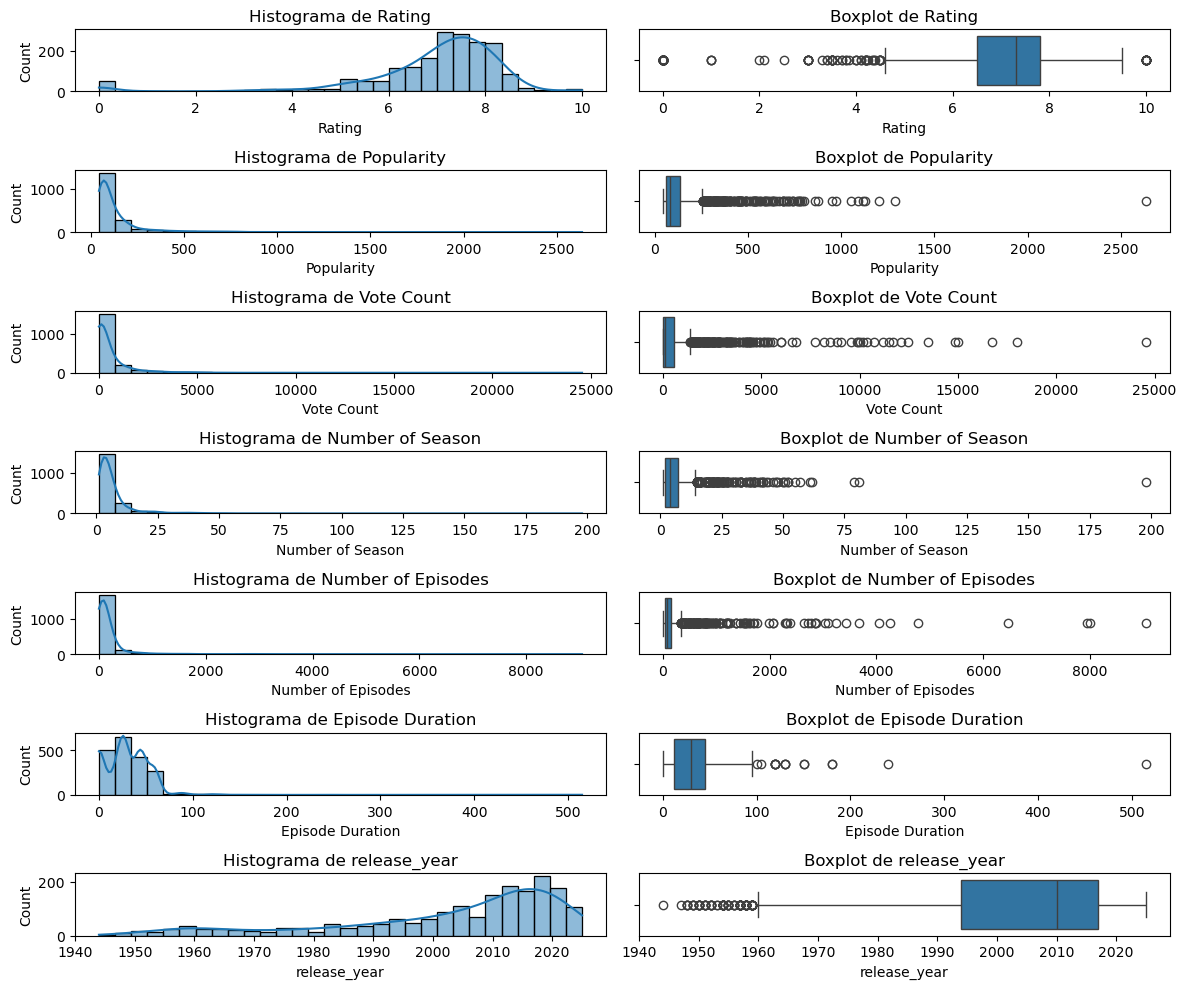

In [252]:
plt.figure(figsize=(12, 10))
for i, column in enumerate(num, 1):
    plt.subplot(len(num), 2, i*2-1)
    sns.histplot(df_merged[column], bins = 30, kde = True)
    plt.title(f"Histograma de {column}")

    plt.subplot(len(num), 2, i*2)
    sns.boxplot(x=df_merged[column])
    plt.title(f"Boxplot de {column}")

plt.tight_layout()
plt.show()

### RATING

In [253]:
# vemos los outliers
iqr = np.percentile(df_merged["Rating"],75) - np.percentile(df_merged["Rating"],25)
upper_limit = np.percentile(df_merged["Rating"],75) + 1.5*iqr
lower_limit = np.percentile(df_merged["Rating"],25) - 1.5*iqr
print(upper_limit)
print(lower_limit)

9.75
4.550000000000001


In [254]:
df_merged[df_merged["Rating"] == 0] 

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,nominada,win,num_emmys,release_year
253,full circle,Full Circle is a short-lived American soap ope...,"Drama, Family",0.0,206.663,0,False,Ended,1,182,30.0,No platforms available,No reviews,0.0,False,0.0,1960.0
278,landscapers' challenge,Three landscapers present designs to remake a ...,Reality,0.0,195.581,0,False,Ended,12,149,30.0,No platforms available,No reviews,0.0,False,0.0,2002.0
297,dennis miller,NaN,"War & Politics, Comedy",0.0,190.069,0,False,Ended,2,223,60.0,No platforms available,No reviews,0.0,False,0.0,2004.0
326,cinema insomnia,Cinema Insomnia is a nationally syndicated Ame...,Comedy,0.0,179.998,0,True,Returning Series,8,112,0.0,No platforms available,No reviews,0.0,False,0.0,NaN
340,the whistler,NaN,Sci-Fi & Fantasy,0.0,176.486,0,False,Ended,1,39,30.0,Mediaset Infinity,No reviews,0.0,False,0.0,1954.0
345,brahma mudi,The lives of Kavya and her sisters change fore...,"Comedy, Drama, Family",0.0,174.983,0,True,Returning Series,1,192,0.0,Hotstar,No reviews,0.0,False,0.0,2023.0
420,molto mario,NaN,Documentary,0.0,154.382,0,False,Canceled,9,382,30.0,No platforms available,No reviews,0.0,False,0.0,NaN
438,hey! (ew),The least violent talk show in wrestling.,Talk,0.0,149.561,0,True,Returning Series,4,124,0.0,No platforms available,No reviews,0.0,False,0.0,2022.0
446,play pals,Two best friends and some of the most ridiculo...,Comedy,0.0,148.477,0,False,Ended,10,213,0.0,No platforms available,No reviews,0.0,False,0.0,2014.0
545,the dish,The Dish was a satirical television series tha...,Comedy,0.0,128.751,0,False,Ended,3,98,26.5,No platforms available,No reviews,0.0,False,0.0,2008.0


In [255]:
# los sustituyo por la media
mean = df_merged.loc[df_merged["Rating"]!=0, "Rating"].mean()
df_merged["Rating"] = df_merged["Rating"].replace(0, mean)


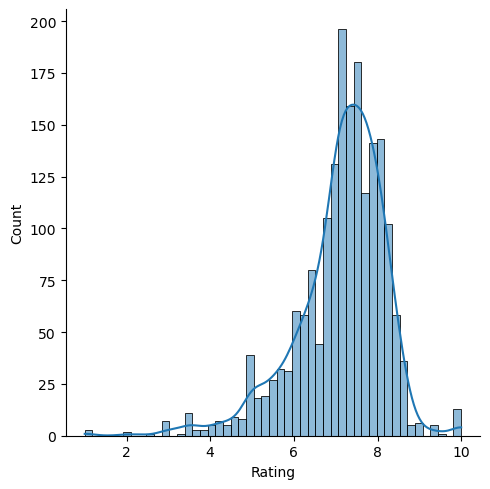

In [256]:
sns.displot(df_merged["Rating"], kde = True)
plt.show()

In [257]:
df_merged[df_merged["Rating"] == 10] 

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,nominada,win,num_emmys,release_year
331,the leveling of solo leveling,A two-part documentary that aims to explore th...,Documentary,10.0,178.732,1,False,Ended,1,2,21.0,"Crunchyroll Amazon Channel, Crunchyroll",No reviews,0.0,False,0.0,2024.0
369,the egos,A bunch of unknown actors create a TV show abo...,Comedy,10.0,169.063,2,True,Returning Series,8,156,22.0,No platforms available,The new shooting style helps.,0.0,False,0.0,2016.0
382,highly questionable,Lively sports commentary with a rotating cast ...,Talk,10.0,164.918,1,False,Ended,11,784,22.0,No platforms available,No reviews,0.0,False,0.0,NaN
450,cosmic disclosure,"For the first time ever, a 30-year insider has...","Documentary, Sci-Fi & Fantasy, Mystery",10.0,147.936,2,True,Returning Series,20,268,32.0,Gaia Amazon Channel,No reviews,0.0,False,0.0,2015.0
589,wwe confidential,NaN,"Action & Adventure, Documentary, Drama",10.0,121.273,3,False,Ended,3,80,60.0,"Peacock Premium, Peacock Premium Plus",No reviews,0.0,False,0.0,2002.0
1022,family time,"The Stallworths, a working class African Ameri...",Comedy,10.0,81.174,3,False,Ended,8,76,0.0,No platforms available,No reviews,0.0,False,0.0,2012.0
1075,superbuns,Superbuns saves the day with the power of a ki...,"Kids, Animation",10.0,77.852,1,True,Returning Series,1,39,0.0,"Peacock Premium, StackTV Amazon Channel, fuboT...",No reviews,0.0,False,0.0,2023.0
1078,monster factory,Monster Factory is a web series available in P...,Comedy,10.0,77.766,2,True,Returning Series,1,87,22.0,No platforms available,No reviews,0.0,False,0.0,2015.0
1097,food paradise,A taste of America's one-of-a-kind dining expe...,Documentary,10.0,76.279,2,True,Returning Series,3,48,43.0,"Discovery +, Max, Citytvplus Amazon Channel, V...",No reviews,0.0,False,0.0,2007.0
1283,bossy bear,In the Korean town-inspired city of Pleasantbu...,"Kids, Animation, Comedy",10.0,66.879,1,True,Returning Series,1,54,0.0,"Jio Cinema, Allente, SkyShowtime, TV 2, Movist...",No reviews,0.0,False,0.0,2023.0


In [258]:
# vemos los outliers
iqr = np.percentile(df_merged["Rating"],75) - np.percentile(df_merged["Rating"],25)
upper_limit = np.percentile(df_merged["Rating"],75) + 1.5*iqr
lower_limit = np.percentile(df_merged["Rating"],25) - 1.5*iqr
print(upper_limit)
print(lower_limit)

9.519
4.9350000000000005


In [259]:
removed = df_merged[df_merged["Rating"] > upper_limit]
len(removed)  # This checks the number of outliers that will be removed, too many

13

In [260]:
removed = df_merged[df_merged["Rating"] < lower_limit]
len(removed)  # This checks the number of outliers that will be removed, too many

69

### POPULARITY

Text(0.5, 1.0, 'Boxplot')

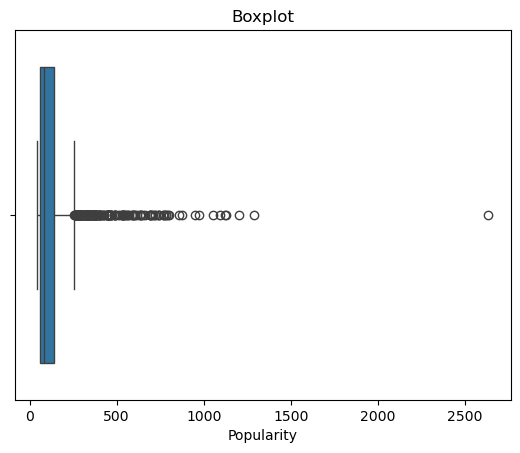

In [261]:
sns.boxplot(data = df_merged, x="Popularity")
plt.title(f"Boxplot")

Text(0.5, 1.0, 'Histograma')

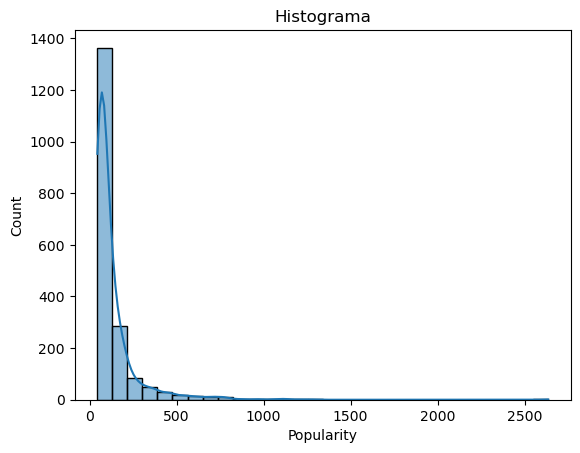

In [262]:
sns.histplot(data = df_merged, x= "Popularity", bins = 30, kde = True)
plt.title(f"Histograma")

In [263]:
# Checking how many values will be removed if the outliers are removed
iqr = np.percentile(df_merged["Popularity"],75) - np.percentile(df_merged["Popularity"],25)
upper_limit = np.percentile(df_merged["Popularity"],75) + 1.5*iqr
print(upper_limit)


256.50224999999995


In [264]:
removed = df_merged[df_merged["Popularity"] > upper_limit]
len(removed)  # This checks the number of outliers that will be removed, too many

179

In [265]:
df_merged.loc[[df_merged["Popularity"].idxmax()]]

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,nominada,win,num_emmys,release_year
0,world news tonight with david muir,ABC World News is the flagship daily evening t...,News,5.5,2634.905,8,True,Returning Series,32,108,30.0,No platforms available,No reviews,0.0,False,0.0,1948.0


In [266]:
df_merged = df_merged.drop(df_merged[df_merged["Popularity"] == 2634.905].index)

Text(0.5, 1.0, 'Boxplot')

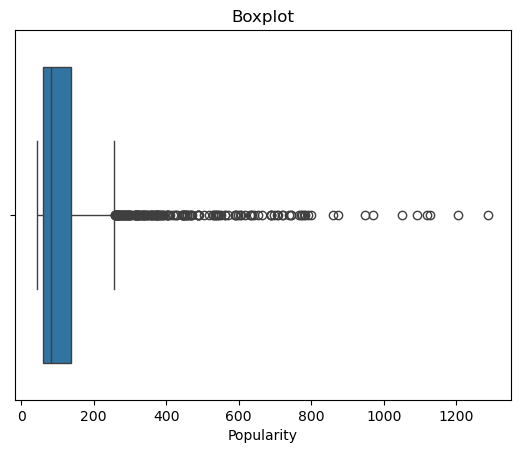

In [267]:
sns.boxplot(data = df_merged, x="Popularity")
plt.title(f"Boxplot")

In [268]:
# no los voy a eliminar, haré transformación

In [269]:
def log_transfom_clean_(x):
    if np.isfinite(x) and x!=0:
        return np.log(x)
    else:
        return np.NAN # 

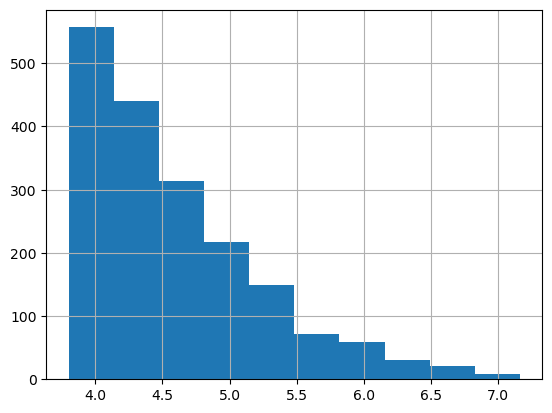

In [270]:
# Using the functions to check the distribution of transformed data
pd.Series(map(log_transfom_clean_, df_merged['Popularity'])).hist()
plt.show()

/var/folders/2x/t9dxtxdd28d5d8ddpkgy0y200000gq/T/ipykernel_10005/1619807062.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_merged['Popularity'])


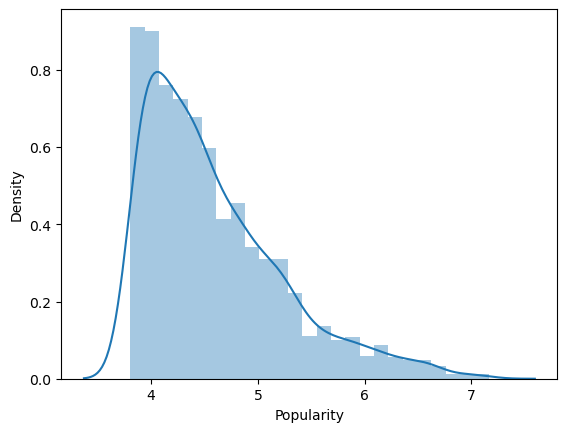

In [271]:
# Use log transformation to replace the values of the column now
df_merged['Popularity'] = list(map(log_transfom_clean_, df_merged['Popularity']))
sns.distplot(df_merged['Popularity'])
plt.show()

### VOTE COUNT

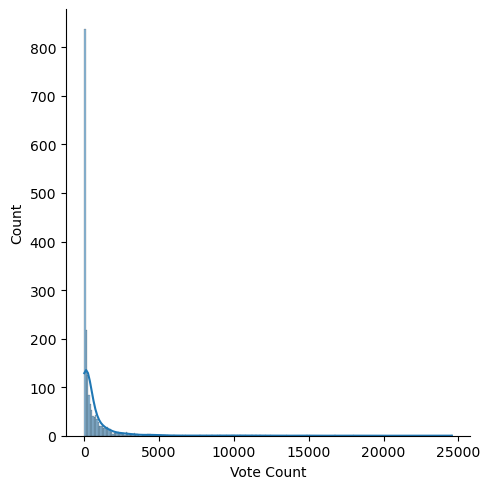

In [272]:
sns.displot(df_merged["Vote Count"], kde = True)
plt.show()

In [273]:
# Checking how many values will be removed if the outliers are removed
iqr = np.percentile(df_merged["Vote Count"],75) - np.percentile(df_merged["Vote Count"],25)
upper_limit = np.percentile(df_merged["Vote Count"],75) + 1.5*iqr
print(upper_limit)

1398.375


In [274]:
removed = df_merged[df_merged["Vote Count"] > upper_limit]
len(removed)  # This checks the number of outliers that will be removed

217

In [275]:
df_merged.loc[[df_merged["Vote Count"].idxmax()]]

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,nominada,win,num_emmys,release_year
16,game of thrones,Seven noble families fight for control of the ...,"Sci-Fi & Fantasy, Drama, Action & Adventure",8.5,6.652225,24560,False,Ended,8,73,0.0,"Sky X, Spectrum On Demand, Strim, Neon TV, Mov...",I started watching when it came out as I heard...,1.0,True,59.0,2011.0


In [276]:
# miro a ver si hay ceros
df_merged[df_merged["Vote Count"] == 0] 

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,nominada,win,num_emmys,release_year
253,full circle,Full Circle is a short-lived American soap ope...,"Drama, Family",7.113552,5.331089,0,False,Ended,1,182,30.0,No platforms available,No reviews,0.0,False,0.0,1960.0
278,landscapers' challenge,Three landscapers present designs to remake a ...,Reality,7.113552,5.275975,0,False,Ended,12,149,30.0,No platforms available,No reviews,0.0,False,0.0,2002.0
297,dennis miller,NaN,"War & Politics, Comedy",7.113552,5.247387,0,False,Ended,2,223,60.0,No platforms available,No reviews,0.0,False,0.0,2004.0
326,cinema insomnia,Cinema Insomnia is a nationally syndicated Ame...,Comedy,7.113552,5.192946,0,True,Returning Series,8,112,0.0,No platforms available,No reviews,0.0,False,0.0,NaN
340,the whistler,NaN,Sci-Fi & Fantasy,7.113552,5.173242,0,False,Ended,1,39,30.0,Mediaset Infinity,No reviews,0.0,False,0.0,1954.0
345,brahma mudi,The lives of Kavya and her sisters change fore...,"Comedy, Drama, Family",7.113552,5.164689,0,True,Returning Series,1,192,0.0,Hotstar,No reviews,0.0,False,0.0,2023.0
420,molto mario,NaN,Documentary,7.113552,5.039430,0,False,Canceled,9,382,30.0,No platforms available,No reviews,0.0,False,0.0,NaN
438,hey! (ew),The least violent talk show in wrestling.,Talk,7.113552,5.007704,0,True,Returning Series,4,124,0.0,No platforms available,No reviews,0.0,False,0.0,2022.0
446,play pals,Two best friends and some of the most ridiculo...,Comedy,7.113552,5.000430,0,False,Ended,10,213,0.0,No platforms available,No reviews,0.0,False,0.0,2014.0
545,the dish,The Dish was a satirical television series tha...,Comedy,7.113552,4.857880,0,False,Ended,3,98,26.5,No platforms available,No reviews,0.0,False,0.0,2008.0


In [277]:
# sustituyo los 0 por la media
mean= df_merged.loc[df_merged["Vote Count"]!= 0, "Vote Count"].mean()
df_merged["Vote Count"] = df_merged["Vote Count"].replace(0, mean)

In [278]:
# no voy a eliminar los outliers, haré transformación

In [279]:
def log_transfom_clean_(x):
    if np.isfinite(x) and x!=0:
        return np.log(x)
    else:
        return np.NAN # We are returning NaNs so that we can replace them later

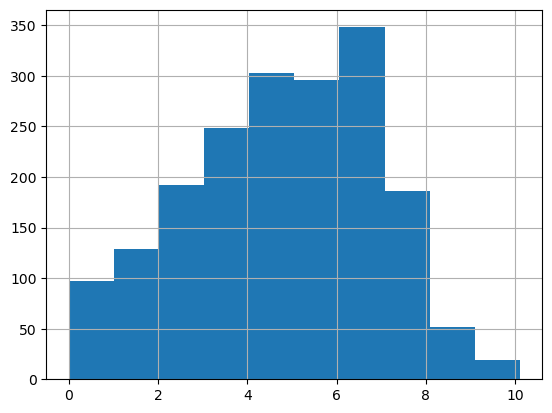

In [280]:
# Using the functions to check the distribution of transformed data
pd.Series(map(log_transfom_clean_, df_merged['Vote Count'])).hist()
plt.show()

/var/folders/2x/t9dxtxdd28d5d8ddpkgy0y200000gq/T/ipykernel_10005/943909959.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_merged['Vote Count'])


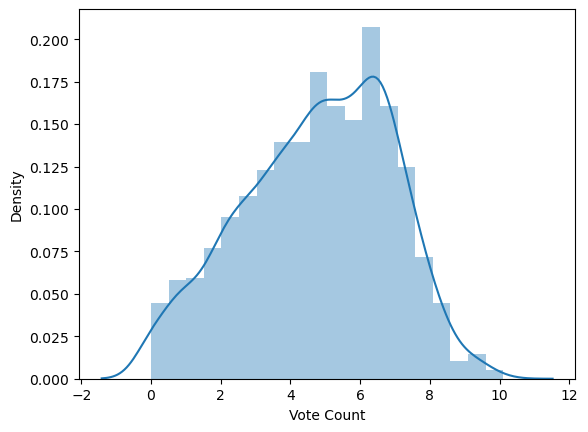

In [281]:
# Use log transformation to replace the values of the column now
df_merged['Vote Count'] = list(map(log_transfom_clean_, df_merged['Vote Count']))
sns.distplot(df_merged['Vote Count'])
plt.show()

### NUMBER OF SEASONS

Text(0.5, 1.0, 'Histograma')

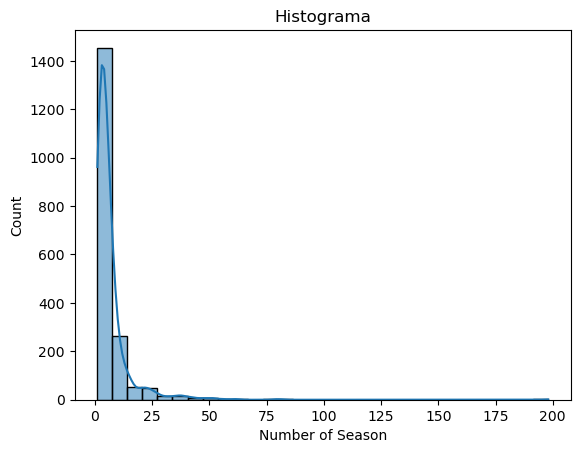

In [282]:
sns.histplot(data = df_merged, x= "Number of Season", bins = 30, kde = True)
plt.title(f"Histograma")

Text(0.5, 1.0, 'Number of Season')

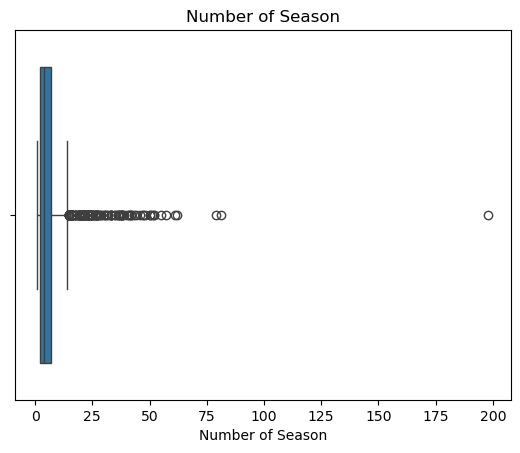

In [283]:
sns.boxplot(data = df_merged, x="Number of Season")
plt.title(f"Number of Season")

In [284]:
df_merged.loc[[df_merged["Number of Season"].idxmax()]]

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,nominada,win,num_emmys,release_year
1570,house hunters international,This spin-off of the wildly popular House Hunt...,Reality,6.4,4.01741,3.218876,True,Returning Series,198,1579,23.0,"Discovery+, Discovery +, Hulu, Max, Discovery+...",No reviews,0.0,False,0.0,2006.0


In [285]:
# elimino la serie de 198 temporadas aunque sea correcta
df_merged = df_merged.drop(df_merged[df_merged["Number of Season"]== 198].index)

In [286]:
df_merged[df_merged["Number of Season"]> 20] # hay 99 series que tienen más de 20 temporadas 


,Title,Synopsis,Genero,Rating,Popularity,Vote Count,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,nominada,win,num_emmys,release_year
5,grey's anatomy,Follows the personal and professional lives of...,Drama,8.200,6.996062,9.246672,True,Returning Series,21,440,43.0,"Hulu, Hotstar, Kinopoisk, Amazon Prime Video, ...",Worst show ever. Shonda needs to stop right NO...,1.0,True,5.0,2005.0
6,judge judy,Judge Judy is an American arbitration-based re...,Crime,5.800,6.957790,4.477337,False,Ended,25,1530,22.0,"Tele2 Play, Foxtel Now",No reviews,0.0,False,0.0,1996.0
10,law & order: special victims unit,"In the criminal justice system, sexually-based...","Crime, Drama, Mystery",7.900,6.755934,8.262043,True,Returning Series,26,565,43.0,"TF1+, Sky X, Strim, Movistar Plus+ Ficción Tot...",This series is a poster child for the way the ...,1.0,True,7.0,1999.0
21,ncis,From murder and espionage to terrorism and sto...,"Crime, Drama, Action & Adventure",7.600,6.605648,7.744570,True,Returning Series,22,479,0.0,"Sky X, Tivify, Strim, Lepsi TV, Movistar Plus+...",Written to depress young men.\r\nIt seems that...,1.0,False,0.0,2003.0
22,cops,Follow real-life law enforcement officers from...,Reality,6.668,6.582213,5.135798,True,Returning Series,36,1229,26.0,"Amazon Prime Video with Ads, Amazon Prime Vide...",No reviews,1.0,False,0.0,1989.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1661,power rangers,A team of teenagers with attitude are recruite...,"Action & Adventure, Sci-Fi & Fantasy, Kids",7.100,3.959517,6.647688,False,Ended,30,973,22.0,"Netflix basic with Ads, TVNZ, Netflix",A childhood classic! | Rating and reviewing Po...,0.0,False,0.0,1993.0
1685,the jerry springer show,The Jerry Springer Show is a syndicated televi...,Talk,4.200,3.947699,3.850148,True,Returning Series,27,348,45.0,"Peacock Premium, Peacock Premium Plus",No reviews,0.0,False,0.0,1991.0
1709,the ed sullivan show,The Ed Sullivan Show is an American TV variety...,"Comedy, Talk",6.600,3.937242,2.995732,False,Ended,24,1068,60.0,No platforms available,No reviews,1.0,True,1.0,1948.0
1745,modern marvels,HISTORY’s longest-running series moves to H2. ...,Documentary,7.900,3.916453,3.295837,True,Returning Series,23,705,44.0,"History, Amazon Prime Video with Ads, Amazon P...",No reviews,0.0,False,0.0,1993.0


In [287]:
# puede parecer raro pero sí, la serie diners, drive-ins and dives tiene 51 temporadas a pesar de haberse estrenado en 2007
# he revisado en internet y el número de temporadas de estas series es correcto
# HELL'S KITCHEN IGUAL, TIENE 23 TEMPORADAS Y SOLO SE ESTRENÓ EN 2005

In [288]:
df_merged[df_merged["Number of Season"]> 20].groupby("Status").size()
# la mayoría siguen en producción, 4 fueron canceladas y 12 acabaron

Status
Canceled             4
Ended               12
Returning Series    83
dtype: int64

In [289]:
df_merged.loc[[df_merged["Number of Season"].idxmin()]] # el número mínimo de temporadas es 1

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,nominada,win,num_emmys,release_year
36,paradise,"The tranquility in a serene, wealthy community...","Drama, Crime",7.734,6.448753,3.465736,True,Returning Series,1,8,0.0,"Disney Plus, Hulu, Hotstar",No reviews,1.0,False,0.0,2025.0


In [290]:
# data in Number of Season is highly skewed. Let's try some transformations (again)

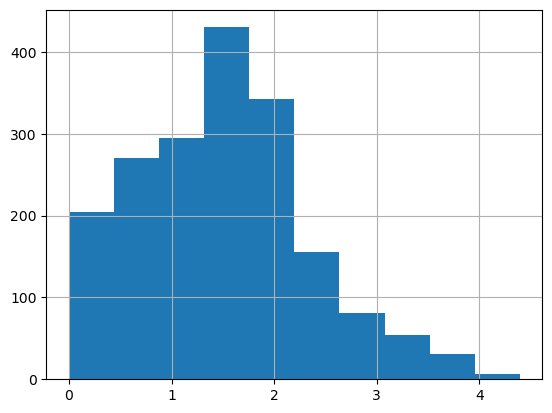

In [291]:
# Using the functions to check the distribution of transformed data
pd.Series(map(log_transfom_clean_, df_merged['Number of Season'])).hist()
plt.show()

/var/folders/2x/t9dxtxdd28d5d8ddpkgy0y200000gq/T/ipykernel_10005/3636049400.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_merged['Number of Season'])


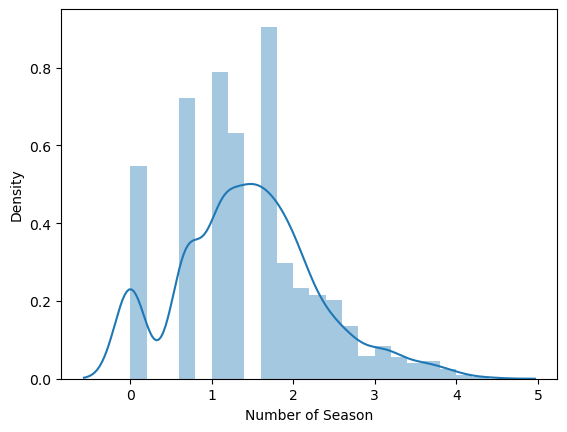

In [292]:
# Use log transformation to replace the values of the column now
df_merged['Number of Season'] = list(map(log_transfom_clean_, df_merged['Number of Season']))
sns.distplot(df_merged['Number of Season'])
plt.show()

### NUMBER OF EPISODES

Text(0.5, 1.0, 'Histograma')

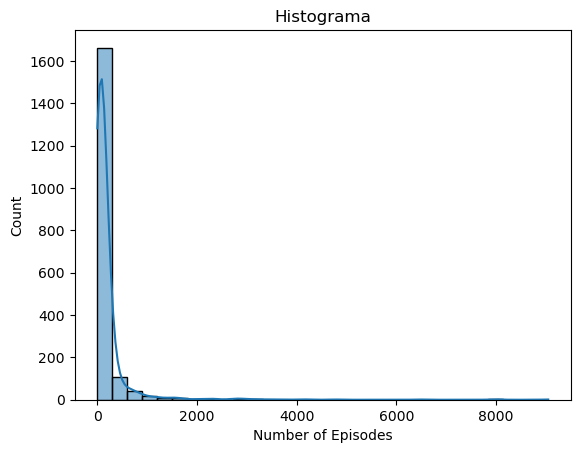

In [293]:
sns.histplot(data = df_merged, x= "Number of Episodes", bins = 30, kde = True)
plt.title(f"Histograma")

Text(0.5, 1.0, 'Boxplot')

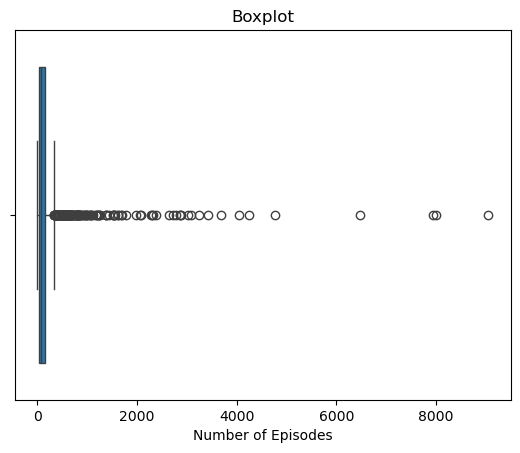

In [294]:
sns.boxplot(data = df_merged, x="Number of Episodes")
plt.title(f"Boxplot")

In [295]:
# number of episodes también está highly skewed

In [296]:
df_merged.loc[[df_merged["Number of Episodes"].idxmax()]] 

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,nominada,win,num_emmys,release_year
30,jeopardy!,America's favorite quiz show where contestants...,"Reality, Family",6.9,6.535801,4.875197,True,Returning Series,3.713572,9045,26.0,fuboTV,No reviews,0.0,False,0.0,1984.0


In [297]:
df_merged.loc[[df_merged["Number of Episodes"].idxmin()]] 
# la serie más corta es the leveling of solo leveling con 2 episodios

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,nominada,win,num_emmys,release_year
331,the leveling of solo leveling,A two-part documentary that aims to explore th...,Documentary,10.0,5.185887,0.0,False,Ended,0.0,2,21.0,"Crunchyroll Amazon Channel, Crunchyroll",No reviews,0.0,False,0.0,2024.0


In [298]:
# Checking how many values will be removed if the outliers are removed
iqr = np.percentile(df_merged["Number of Episodes"],75) - np.percentile(df_merged["Number of Episodes"],25)
upper_limit = np.percentile(df_merged["Number of Episodes"],75) + 1.5*iqr
print(upper_limit)

336.5


In [299]:
removed = df_merged[df_merged["Number of Episodes"] > upper_limit]
len(removed)  # This checks the number of outliers that will be removed, too many

178

In [300]:
df_merged[df_merged["Number of Episodes"]> 336] # hay 178 series con más de 336 episodios

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,nominada,win,num_emmys,release_year
1,tmz,"Based on the popular gossip website, this ente...","News, Comedy",4.368,7.161263,2.944439,True,Returning Series,1.609438,672,30.0,fuboTV,No reviews,0.0,False,0.0,2007.0
2,the chew,The Chew is an American talk show/cooking show...,Talk,5.500,7.093905,1.791759,False,Ended,1.945910,1229,60.0,No platforms available,No reviews,0.0,False,0.0,2011.0
3,american idol,"Each year, hopeful singers from all over the c...",Reality,5.078,7.028138,5.075174,False,Ended,2.708050,567,85.0,Tivify,"American idol, a season and series juggernaut,...",1.0,True,8.0,2002.0
4,america says,"In this family-friendly game show, two teams f...",Family,4.200,7.020924,2.639057,True,Returning Series,1.791759,495,25.0,fuboTV,No reviews,0.0,False,0.0,2018.0
5,grey's anatomy,Follows the personal and professional lives of...,Drama,8.200,6.996062,9.246672,True,Returning Series,3.044522,440,43.0,"Hulu, Hotstar, Kinopoisk, Amazon Prime Video, ...",Worst show ever. Shonda needs to stop right NO...,1.0,True,5.0,2005.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1745,modern marvels,HISTORY’s longest-running series moves to H2. ...,Documentary,7.900,3.916453,3.295837,True,Returning Series,3.135494,705,44.0,"History, Amazon Prime Video with Ads, Amazon P...",No reviews,0.0,False,0.0,1993.0
1747,the drew barrymore show,Drew Barrymore presents human-interest stories...,Talk,5.600,3.915876,2.302585,True,Returning Series,1.609438,382,43.0,"Paramount Plus Apple TV Channel , fuboTV",No reviews,0.0,False,0.0,2020.0
1763,being the elite,"The Young Bucks, Matt & Nick Jackson, along wi...","Documentary, Comedy, Reality",5.000,3.905502,1.098612,True,Returning Series,1.609438,374,17.0,No platforms available,No reviews,0.0,False,0.0,2016.0
1870,people puzzler,Three lucky contestants put their pop culture ...,Reality,5.500,3.850637,2.564949,True,Returning Series,1.386294,379,23.0,fuboTV,No reviews,0.0,False,0.0,2021.0


In [301]:
df_merged[df_merged["Number of Episodes"]> 362].groupby(["release_year", "Number of Episodes"])\
    .size().reset_index().sort_values(by="Number of Episodes", ascending =False)
# la mayoría de series con más de 1000 episodios son de los años 90

,release_year,Number of Episodes,0
38,1984.0,9045,1
25,1973.0,7999,1
41,1987.0,7940,1
47,1988.0,6469,1
69,1997.0,4776,1
...,...,...,...
53,1992.0,374,1
93,2005.0,373,1
141,2015.0,369,1
79,2001.0,369,1


In [302]:
df_merged[df_merged["Title"] == "conan"] # desde el 2010 hasta el 2021

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,nominada,win,num_emmys,release_year
9,conan,A late night television talk show hosted by C...,"Talk, Comedy, News",7.04,6.773911,5.42495,False,Ended,2.397895,1510,41.333333,No platforms available,No reviews,1.0,False,0.0,2010.0


In [303]:
df_merged[df_merged["Title"] == "the tonight show starring johnny carson"] 

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,nominada,win,num_emmys,release_year
106,the tonight show starring johnny carson,The Tonight Show Starring Johnny Carson is a t...,Talk,7.407,5.915558,4.248495,False,Ended,3.433987,3428,60.0,"Peacock Premium, Peacock Premium Plus, fuboTV",No reviews,1.0,True,6.0,1962.0


In [304]:
df_merged.loc[df_merged["Title"] == "the tonight show starring johnny carson", "Number of Episodes"]= 6714

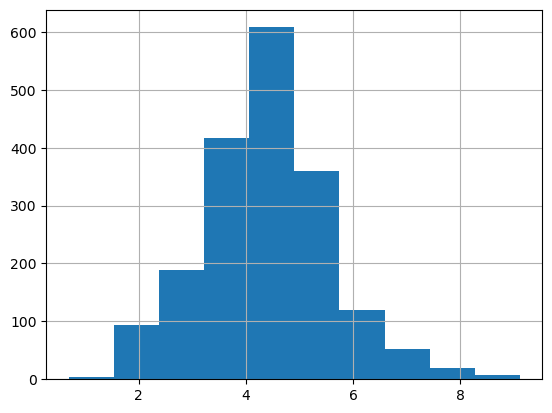

In [305]:
# Using the functions to check the distribution of transformed data
pd.Series(map(log_transfom_clean_, df_merged["Number of Episodes"])).hist()
plt.show()

/var/folders/2x/t9dxtxdd28d5d8ddpkgy0y200000gq/T/ipykernel_10005/576836579.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_merged["Number of Episodes"])


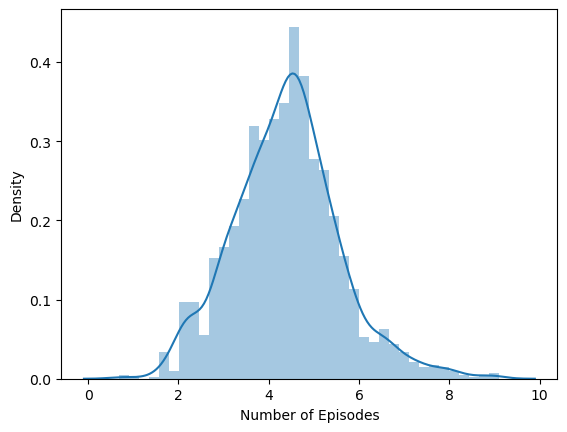

In [306]:
# Use log transformation to replace the values of the column now
df_merged["Number of Episodes"] = list(map(log_transfom_clean_, df_merged["Number of Episodes"]))
sns.distplot(df_merged["Number of Episodes"])
plt.show()

### EPISODE DURATION

Text(0.5, 1.0, 'Histograma')

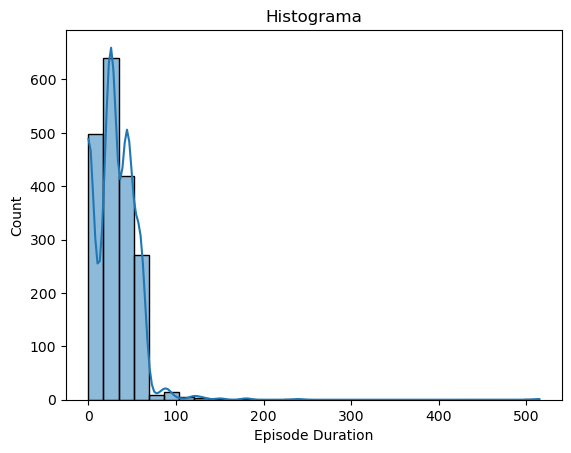

In [307]:
sns.histplot(data = df_merged, x= "Episode Duration", bins = 30, kde = True)
plt.title(f"Histograma")

Text(0.5, 1.0, 'Boxplot')

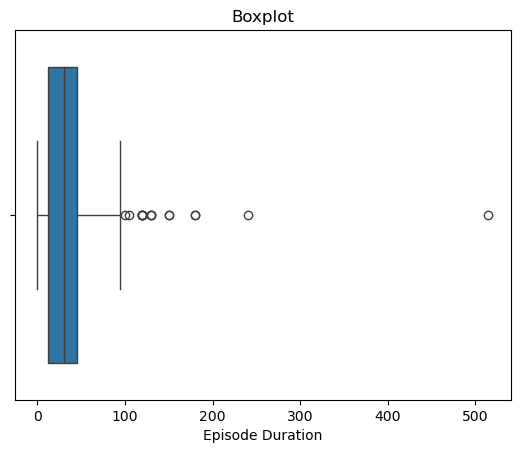

In [308]:
sns.boxplot(data = df_merged, x="Episode Duration")
plt.title(f"Boxplot")

In [309]:
# Checking how many values will be removed if the outliers are removed
iqr = np.percentile(df_merged["Episode Duration"],75) - np.percentile(df_merged["Episode Duration"],25)
upper_limit = np.percentile(df_merged["Episode Duration"],75) + 1.5*iqr
print(upper_limit)


94.5


In [310]:
removed = df_merged[df_merged["Episode Duration"] > upper_limit]
len(removed)  # This checks the number of outliers that will be removed, too many

16

In [311]:
df_merged[df_merged["Episode Duration"]> 94] 

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,nominada,win,num_emmys,release_year
53,dimension 20,Heed the call of adventure and enter Dimension...,"Sci-Fi & Fantasy, Comedy, Reality, Action & Ad...",9.300000,6.281678,2.639057,True,Returning Series,3.178054,5.568345,120.0,No platforms available,No reviews,0.0,False,0.0,2018.0
69,raw,"A regularly scheduled, live, year-round progra...",Reality,6.800000,6.139512,5.786897,True,Returning Series,3.496508,7.440734,130.0,"Discovery+, Peacock Premium, fuboTV, Netflix b...",No reviews,0.0,False,0.0,1993.0
147,live pd,Dash cams capture footage from urban and rural...,"Documentary, Crime, Reality",7.592000,5.707950,3.637586,False,Canceled,1.386294,5.713733,180.0,No platforms available,No reviews,0.0,False,0.0,2016.0
377,home & family,Host Debbie Matenopoulos & her expert guests p...,Talk,8.200000,5.120804,1.609438,False,Ended,2.197225,5.517453,120.0,No platforms available,No reviews,0.0,False,0.0,2012.0
628,ray donovan,Set in the sprawling mecca of the rich and fam...,Drama,7.500000,4.755949,6.625392,False,Canceled,1.945910,4.406719,100.0,"Spectrum On Demand, Strim, Paramount Plus, Ama...",Ray Donovan can be summed up it one word: 'Bun...,1.0,True,1.0,2013.0
632,dancing with the stars,The competition sees celebrities perform chore...,"Family, Reality",6.000000,4.753185,4.663439,True,Returning Series,3.496508,6.212606,105.0,Disney Plus,No reviews,1.0,True,16.0,2005.0
800,mtv video music awards,An annual award ceremony presented by MTV to h...,Documentary,7.500000,4.567198,2.944439,True,Returning Series,3.713572,3.713572,120.0,No platforms available,No reviews,1.0,False,0.0,1984.0
832,golden globe awards,An annual awards ceremony recognizing excellen...,Talk,6.800000,4.533900,2.639057,True,Returning Series,4.394449,4.394449,130.0,Max,No reviews,0.0,False,0.0,1944.0
986,the situation room with wolf blitzer,"The command center for breaking news, politics...",War & Politics,3.000000,4.415884,1.945910,True,Returning Series,2.302585,7.017506,150.0,No platforms available,No reviews,0.0,False,0.0,2005.0
1204,the herd with colin cowherd,Radio show about sports news.,Talk,7.113552,4.262497,6.469488,True,Returning Series,2.302585,7.735433,180.0,No platforms available,No reviews,0.0,False,0.0,2015.0


In [312]:
# TODAS SON CORRECTAS MENOS the wonderful world of disney que dura 70 min y ray donovan que dura 50 min aprox, 
# MANI no he conseguido encontrar la duración

In [313]:
df_merged.loc[df_merged["Title"] == "the wonderful world of disney", "Episode Duration"]= 70 

In [314]:
df_merged.loc[df_merged["Title"] == "ray donovan", "Episode Duration"]= 50

In [315]:
df_merged = df_merged.drop(df_merged[df_merged["Title"]== "mani"].index)

In [316]:
# he cambiado los valores de 2 porque estaban incorrectos
df_merged[df_merged["Episode Duration"]> 94] 

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,nominada,win,num_emmys,release_year
53,dimension 20,Heed the call of adventure and enter Dimension...,"Sci-Fi & Fantasy, Comedy, Reality, Action & Ad...",9.300000,6.281678,2.639057,True,Returning Series,3.178054,5.568345,120.0,No platforms available,No reviews,0.0,False,0.0,2018.0
69,raw,"A regularly scheduled, live, year-round progra...",Reality,6.800000,6.139512,5.786897,True,Returning Series,3.496508,7.440734,130.0,"Discovery+, Peacock Premium, fuboTV, Netflix b...",No reviews,0.0,False,0.0,1993.0
147,live pd,Dash cams capture footage from urban and rural...,"Documentary, Crime, Reality",7.592000,5.707950,3.637586,False,Canceled,1.386294,5.713733,180.0,No platforms available,No reviews,0.0,False,0.0,2016.0
377,home & family,Host Debbie Matenopoulos & her expert guests p...,Talk,8.200000,5.120804,1.609438,False,Ended,2.197225,5.517453,120.0,No platforms available,No reviews,0.0,False,0.0,2012.0
632,dancing with the stars,The competition sees celebrities perform chore...,"Family, Reality",6.000000,4.753185,4.663439,True,Returning Series,3.496508,6.212606,105.0,Disney Plus,No reviews,1.0,True,16.0,2005.0
800,mtv video music awards,An annual award ceremony presented by MTV to h...,Documentary,7.500000,4.567198,2.944439,True,Returning Series,3.713572,3.713572,120.0,No platforms available,No reviews,1.0,False,0.0,1984.0
832,golden globe awards,An annual awards ceremony recognizing excellen...,Talk,6.800000,4.533900,2.639057,True,Returning Series,4.394449,4.394449,130.0,Max,No reviews,0.0,False,0.0,1944.0
986,the situation room with wolf blitzer,"The command center for breaking news, politics...",War & Politics,3.000000,4.415884,1.945910,True,Returning Series,2.302585,7.017506,150.0,No platforms available,No reviews,0.0,False,0.0,2005.0
1204,the herd with colin cowherd,Radio show about sports news.,Talk,7.113552,4.262497,6.469488,True,Returning Series,2.302585,7.735433,180.0,No platforms available,No reviews,0.0,False,0.0,2015.0
1276,wwe smackdown,The superstars of World Wrestling Entertainmen...,Reality,7.400000,4.211579,5.105945,True,Returning Series,3.295837,7.227662,130.0,"USA Network, Hulu, Peacock Premium, NBC, fuboT...",No reviews,0.0,False,0.0,1999.0


# quiero ver cuales son las series que están mal porque tienen 0 min de duración

In [317]:
df_merged[df_merged["Episode Duration"] == 0] # hay 382

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,nominada,win,num_emmys,release_year
8,yellowstone,"Follow the violent world of the Dutton family,...","Western, Drama",8.243,6.855929,7.869784,False,Ended,1.609438,3.970292,0.0,"Strim, Neon TV, Movistar Plus+ Ficción Total ,...",Legitimately bad writing. All the scenes seem ...,0.0,False,0.0,2018.0
12,dexter,"Dexter Morgan, a blood spatter pattern analyst...","Crime, Drama, Mystery",8.200,6.684659,8.407155,False,Ended,2.079442,4.564348,0.0,"Paramount Plus Premium, Spectrum On Demand, St...",One of the great TV series of all time. To ach...,1.0,True,4.0,2006.0
13,critical role,Critical Role is a weekly livestreamed show th...,"Sci-Fi & Fantasy, Action & Adventure, Drama, C...",8.533,6.675147,2.708050,True,Returning Series,1.098612,5.932245,0.0,No platforms available,No reviews,0.0,False,0.0,2015.0
15,invincible,Mark Grayson is a normal teenager except for t...,"Animation, Sci-Fi & Fantasy, Action & Adventur...",8.600,6.660754,8.429673,True,Returning Series,1.098612,3.178054,0.0,"Timvision, Amazon Prime Video with Ads, Amazon...",Invincible is so freaking good that it’s going...,0.0,False,0.0,2021.0
16,game of thrones,Seven noble families fight for control of the ...,"Sci-Fi & Fantasy, Drama, Action & Adventure",8.500,6.652225,10.108874,False,Ended,2.079442,4.290459,0.0,"Sky X, Spectrum On Demand, Strim, Neon TV, Mov...",I started watching when it came out as I heard...,1.0,True,59.0,2011.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1918,blue eye samurai,Driven by a dream of revenge against those who...,"Action & Adventure, Animation",8.500,3.819535,6.210600,True,Returning Series,0.693147,2.079442,0.0,"Netflix basic with Ads, Netflix",**episode 1 **stellar animation and setup; bea...,0.0,False,0.0,2023.0
1922,glow,"In 1980s LA, a crew of misfits reinvent themse...","Comedy, Drama",7.271,3.816063,5.945421,False,Canceled,1.098612,3.401197,0.0,"Netflix basic with Ads, Netflix",This show has a great mix of comedy and drama....,1.0,True,3.0,2017.0
1925,firefly lane,"For decades, childhood best friends Kate and T...",Drama,7.756,3.813285,5.575949,False,Ended,0.693147,3.258097,0.0,"Netflix basic with Ads, Netflix",No reviews,0.0,False,0.0,2021.0
1930,life in pieces,Comedy about one big happy family and their so...,Comedy,7.100,3.811738,4.828314,False,Canceled,1.386294,4.369448,0.0,"Disney Plus, Hulu, TV 2 Play",No reviews,0.0,False,0.0,2015.0


In [318]:
df_merged[df_merged["Episode Duration"]==0]["Title"].unique()

array(['yellowstone', 'dexter', 'critical role', 'invincible',
       'game of thrones', 'the mentalist', 'ncis', 'breaking bad',
       'rt life', 'survivor', 'the blacklist', 'paw patrol', 'paradise',
       'severance', 'astrid clover', 'shameless', 'desperate housewives',
       'dexter: original sin', 'from', 'beast games', 'the boys', 'lost',
       'animaniacs', 'the good doctor', 'silo', 'bones', 'columbo',
       'high potential', 's.w.a.t.', 'the walking dead', 'fargo',
       'the flash', 'the late show with stephen colbert',
       'csi: crime scene investigation', 'young sheldon',
       'the night agent', 'community', 'teen wolf', 'stranger things',
       'two and a half men', 'hey qween!', 'the sopranos', 'the office',
       'euphoria', 'blue bloods', 'fear the walking dead', 'lioness',
       'house of the dragon', 'reacher', 'seinfeld',
       'the lord of the rings: the rings of power', 'seal team', 'arrow',
       'the orville', 'snowfall', 'arcane', 'better call s

In [319]:
episode_duration= {
    'dexter': 50, 'game of thrones':60, 'the mentalist':40, 'ncis':44,
       'breaking bad':50, 'survivor':60, 'the blacklist':45, 'paradise':55,
       'shameless':50, 'desperate housewives':42, 'lost':43, 'bones':43, 'columbo':78,
       's.w.a.t.':43, 'the walking dead':50, 'fargo':52, 'the flash':43,
       'the late show with stephen colbert':46,
       'csi: crime scene investigation':43, 'community':20, 'stranger things':56,
       'two and a half men':22, 'the sopranos':60, 'the office':30, 'blue bloods':45,
       'seinfeld':24, 'seal team':43, 'the orville':44, 'better call saul':45,
       'newsradio':23, 'futurama':22, 'outlander':60, 'the x-files':50,
       'ghost whisperer':45, 'curb your enthusiasm':30,
       'buffy the vampire slayer':45, 'saturday night live':65,
       "rupaul's drag race":50, 'star trek: discovery':60, 'chernobyl':65,
       'mad men':47, 'jag':44, "tom clancy's jack ryan":60, 'westworld':60,
       "it's always sunny in philadelphia":20, 'web therapy':25,
       'star wars rebels':22, 'medium':45, 'arrested development':22, 'matlock':42,
       'succession':60, 'love, death & robots':15, 'orange is the new black':60,
       'mr. robot':60, 'narcos':50, 'the agency':50,
       'last week tonight with john oliver':32, 'in treatment':25,
       'the equalizer':44, 'what we do in the shadows':30, 'ozark':60, 'entourage':28,
       'days of our lives':60, 'shooter':41, 'little house on the prairie':60,
       'family ties':25, 'the umbrella academy':50, '13 reasons why':50,
       'house of cards':50, 'the marvelous mrs. maisel':57, 'justified':42,
       'deadliest catch':45, 'ballers':30, 'atlanta':30, 'honest trailers':7,
       'my name is earl':21, 'the leftovers':55, 'mindhunter':50, 'six feet under':55,
       'empire':42, 'bates motel':45, 'the six million dollar man':55,
       'naked and afraid':43, 'amazing stories':30, 'the ranch':30,
       'carpool karaoke: the series':18,
       'terminator: the sarah connor chronicles':43, 'the killing':50,
       'the life and legend of wyatt earp':30, 'life on mars':52, 'sense8':60,
       'battlestar galactica':44, 'masters of horror':60, 'the conners':22,
       'epic rap battles of history':5, 'russian doll':25,
       'naked and afraid xl':42, 'glow':35,'yellowstone':60, 'critical role':27, 'invincible':45, 'rt life':5,
       'paw patrol':22, 'severance':45, 'dexter: original sin':50,
       'from':50, 'beast games':50, 'the boys':60, 'animaniacs':23, 'the good doctor':42,
       'silo':50, 'high potential':43, 'young sheldon':20, 'the night agent':50,
       'teen wolf':43, 'hey qween!':38, 'euphoria':55, 'fear the walking dead':45,
       'lioness':45, 'house of the dragon':60, 'reacher':42,
       'the lord of the rings: the rings of power':60, 'arrow':43, 'snowfall':50,
       'arcane':45, 'xo, kitty':30, 'unhhhh':10, 'tulsa king':40, 'ted lasso':35,
       'the witcher':50, 'the jennifer hudson show':60, 'american primeval':50,
       'gossip girl':42, 'the 7d':30, 'the recruit':55, 'bridgerton':60, 'rwby chibi':11,
       'dune: prophecy':60, 'you':50, 'landman':55, 'what if...?':35, 'virgin river':45,
       'the white lotus':55, 'halo':60, '9-1-1: lone star':43,
       'mayor of kingstown':47, 'scorpion':40, 'wednesday':50,
       'white collar':42,'tracker':50, 'night gallery':50,
       'star wars: skeleton crew':40, 'see':54, 'the last of us':55, 'the penguin':60,
       'sex/life':45, 'lego ninjago: dragons rising':23, 'designated survivor':42,
       'common side effects':22, 'shōgun':60, 'hey! (ew)':30, 'tribunal justice':60,
       'mickey mouse clubhouse':23, 'vikings: valhalla':50,
       'the walking dead: daryl dixon':60, '1923':58, 'carnival row':55,
       'beverly hills, 90210':45, 'snowpiercer':45, 'castlevania':25,
       'the mandalorian':40, 'teacup':30, 'titans':45, 'dickinson':30,
       'the real housewives of beverly hills':43, 'the pitt':50,
       'narcos: mexico':60, 'mythic quest':30,
       'the walking dead: the ones who live':45, 'selling sunset':30, 'on call':30,
       'la fan':45, 'the summer i turned pretty':43, 'servant':30, 'wwe 24':30,
       'cupcake wars':42, 'battlefield friends':4, 'elsbeth':43,
       'the kardashians':40, 'karamo show':60, '1883':50, 'emily in paris':30,
       'schmigadoon!':30, 'the replacements':58, 'for all mankind':60,
       'loki':45, 'the wheel of time':60, 'obliterated':50,
       'agatha all along':40, 'the lincoln lawyer':50,
       'fire country':44, 'avatar the last airbender':60,
       'fallout':60, 'will trent':44, 'doc mcstuffins':24, 'creature commandos':23,
       'masters of the air':57, 'norman picklestripes':21, 'hawkeye':40,
       'the falcon and the winter soldier':50, 'highlander: the series':48,
       'the bold and the beautiful':22, 'mayfair witches':60, 'foundation':60,
       'looney tunes cartoons':10, 'invasion':55, 'school spirits':45,
       'peacemaker':43, 'cruel intentions':42, 'fresh off the boat':21,
       'little america':30, 'monsters':50,
       'chilling adventures of sabrina':57, 'shrinking':35, 'johnny bravo':22,
       'the morning show':55, 'wandavision':60, 'ikaw lamang':40,
       'castlevania: nocturne':27, 'only murders in the building':30,
       'the bear':37, 'rainbow high':10, "america's funniest home videos":38,
       'star wars: the bad batch':40, 'walker, texas ranger':43,
       "georgie & mandy's first marriage":20, 'star trek: picard':50,
       'goosebumps':22, 'sweet tooth':45, 'ncis: origins':43, 'cross':55,
       'raised by wolves':50, 'abbott elementary':22, 'one piece':23,
       'star trek: lower decks':30,
       'vindication':30, 'interior chinatown':40, 'the walking dead: dead city':44,
       'tell me lies':49, 'the sandman':50, 'the young turks':54, 'the dead zone':41,
       'superbuns':8, 'godfather of harlem':55, 'secret level':15, 'guidance':27,
       '3 body problem':50, 'disenchantment':30, 'the haunting of hill house':55,
       'my life with the walter boys':45, 'the madness':48, 'love, victor':24,
       'party down':30, 'the chi':60, 'el conde: amor y honor':60,
       "the queen's gambit":50, 'grown-ish':22, 'halloween wars':42,
        'knuckles':30, 'grotesquerie':45, "x-men '97":32,
       'presumed innocent':43, 'dark matter':43, 'roadkill':20,
       'american crime story':42, 'pawn stars':23, 'the irrational':42,
       'rooster teeth animated adventures':15,
       'star wars: andor':41, 'percy jackson and the olympians':40,
       'unusual suspects':42, 'dahmer - monster: the jeffrey dahmer story':50,
       'bossy bear':22, 'elena of avalor':25, 'the great':50, 'kingdom':50,
       'earth abides':52, 'say nothing':44, 'the rachel maddow show':60,
       'stargate origins':10, 'upload':32, 'a man on the inside':30,
       'she-hulk: attorney at law':35, 'those about to die':44, 'walker':42,
       'star trek: strange new worlds':55, 'adventure time: fionna & cake':27,
       'shape island':22, 'crown lake':30, "let's play minecraft":23,
       'monarch: legacy of monsters':60, 'the librarians':43,
       'dateline: unforgettable':85, 'bel-air':51,
       'bbq brawl':30, 'beauty in black':48, 'tabletop':32,
       'sausage party: foodtopia':25, 'the acolyte':40,
       'the shannara chronicles':42, 'the gilded age':54, 'pachinko':52,
       'black bird':58, 'the idol':50, 'the old man':55,
       'voltron: legendary defender':24, 'interview with the vampire':50,
       'ripley':55, 'pantheon':41, 'the flight attendant':45, 'world war two':45,
       'bookie':23, '61st street':45, 'nobody wants this':25, 'pupstruction':11,
       'sonic prime':26, 'poker face':58,
       "guillermo del toro's cabinet of curiosities":60, 'heels':58, 'the ark':43,
       'the continental: from the world of john wick':85, 'gayle':5,
       'sweat equity':20, 'tokyo vice':57, 'watchmen':59, 'ted':40,
       'expedition bigfoot':42, 'monsters at work':25, 'mr. corman':30,
       'the spiderwick chronicles':45, 'the terminal list':55,
       'smosh':5, 'american horror stories':43, 'yellowstone: one-fifty':40,
       'beef':35, 'maid':50, 'the angry video game nerd':30, 'joe pickett':48,
       'outer range':50, 'tumble leaf':22, 'unbelievable':50,
       'the mosquito coast':50, 'new york undercover':60,
       'rubble & crew':18, 'paradise run':23, 'and just like that…':40,
       'love is blind':55, 'acapulco':30, 'blue eye samurai':45, 'firefly lane':50,
       'life in pieces':22, 'human resources':28
}

In [320]:
# Iteramos sobre las filas donde "Episode Duration" es 0
for index, row in df_merged[df_merged["Episode Duration"] == 0].iterrows():
    title = row["Title"]
    # Comprobar si el título está en el diccionario
    if title in episode_duration:
        # Usar loc[] para cambiar el valor en la fila correspondiente
        df_merged.loc[df_merged["Title"] == title, "Episode Duration"] = episode_duration[title]

In [321]:
df_merged[df_merged["Episode Duration"] == 0]


,Title,Synopsis,Genero,Rating,Popularity,Vote Count,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,nominada,win,num_emmys,release_year
40,astrid clover,"With no job and no plan for her future, other ...",Comedy,4.000000,6.394854,0.000000,True,Returning Series,1.791759,5.351858,0.0,No platforms available,No reviews,0.0,False,0.0,2014.0
326,cinema insomnia,Cinema Insomnia is a nationally syndicated Ame...,Comedy,7.113552,5.192946,6.469488,True,Returning Series,2.079442,4.718499,0.0,No platforms available,No reviews,0.0,False,0.0,NaN
345,brahma mudi,The lives of Kavya and her sisters change fore...,"Comedy, Drama, Family",7.113552,5.164689,6.469488,True,Returning Series,0.000000,5.257495,0.0,Hotstar,No reviews,0.0,False,0.0,2023.0
347,la casa de los famosos,NaN,Reality,5.600000,5.161764,2.302585,True,Returning Series,1.609438,5.811141,0.0,"ViX Premium Amazon Channel, Amazon Prime Video...",No reviews,0.0,False,0.0,2021.0
446,play pals,Two best friends and some of the most ridiculo...,Comedy,7.113552,5.000430,6.469488,False,Ended,2.302585,5.361292,0.0,No platforms available,No reviews,0.0,False,0.0,2014.0
691,"china, il","China, IL – meaning ""China, Illinois"" – is an ...",Animation,6.900000,4.691669,3.135494,False,Ended,1.098612,3.401197,0.0,"StackTV Amazon Channel, Adult Swim, fuboTV, Ch...",No reviews,0.0,False,0.0,2011.0
702,strongbad_email.exe,"Strong Bad Email, frequently shortened to sbem...","Comedy, Animation",7.113552,4.680519,6.469488,False,Ended,0.693147,4.867534,0.0,No platforms available,No reviews,0.0,False,0.0,2001.0
723,vanshaj,The issue of inheritance by male members of a ...,"Drama, Family",7.113552,4.640412,6.469488,True,Returning Series,0.000000,5.170484,0.0,Sony Liv,No reviews,0.0,False,0.0,2023.0
744,the conversation,Cenk Uygur sits down for quick but substantive...,Talk,5.000000,4.617938,0.000000,True,Returning Series,1.386294,6.376727,0.0,No platforms available,No reviews,0.0,False,0.0,2019.0
847,pasión de gavilanes,The Reyes-Elizondo's idyllic lives are shatter...,Drama,7.644000,4.519939,7.614805,False,Ended,0.693147,5.598422,0.0,"iflix, NBC, Atres Player, Spectrum On Demand, ...",No reviews,0.0,False,0.0,2003.0


In [322]:
# me quedo con las series que no tienen 0 como duración
df_merged = df_merged[df_merged["Episode Duration"] != 0]

In [323]:
# convierto la duración a int
df_merged["Episode Duration"] = df_merged["Episode Duration"].astype(int)

Text(0.5, 1.0, 'Histograma')

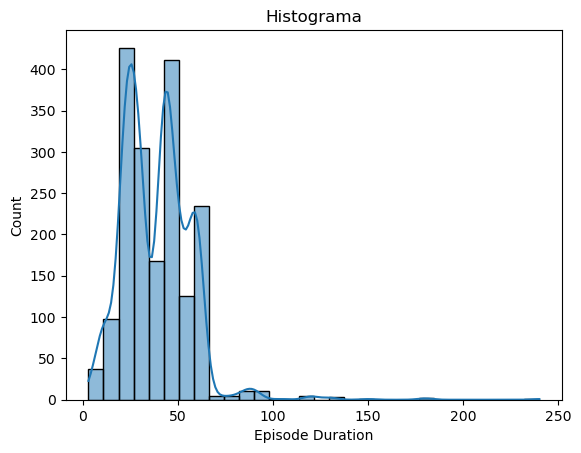

In [324]:
sns.histplot(data = df_merged, x= "Episode Duration", bins = 30, kde = True)
plt.title(f"Histograma")

Text(0.5, 1.0, 'Boxplot')

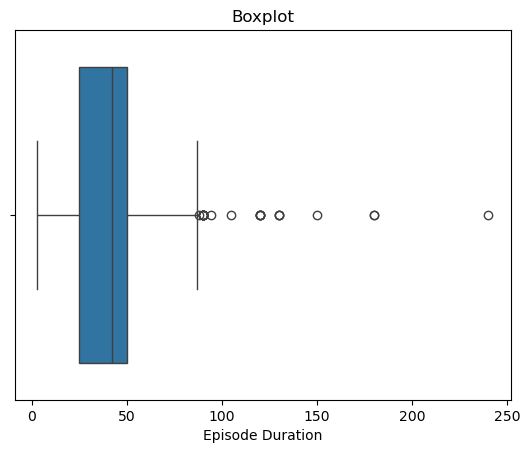

In [325]:
sns.boxplot(data = df_merged, x="Episode Duration")
plt.title(f"Boxplot")

In [326]:
# Checking how many values will be removed if the outliers are removed
iqr = np.percentile(df_merged["Episode Duration"],75) - np.percentile(df_merged["Episode Duration"],25)
upper_limit = np.percentile(df_merged["Episode Duration"],75) + 1.5*iqr
print(upper_limit)

87.5


In [327]:
removed = df_merged[df_merged["Episode Duration"] > upper_limit]
len(removed)  # This checks the number of outliers that will be removed, too many

25

In [328]:
df_merged[df_merged["Episode Duration"]> 87]

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,nominada,win,num_emmys,release_year
53,dimension 20,Heed the call of adventure and enter Dimension...,"Sci-Fi & Fantasy, Comedy, Reality, Action & Ad...",9.300000,6.281678,2.639057,True,Returning Series,3.178054,5.568345,120,No platforms available,No reviews,0.0,False,0.0,2018.0
69,raw,"A regularly scheduled, live, year-round progra...",Reality,6.800000,6.139512,5.786897,True,Returning Series,3.496508,7.440734,130,"Discovery+, Peacock Premium, fuboTV, Netflix b...",No reviews,0.0,False,0.0,1993.0
131,wwe nxt,Wrestlers will portray heroes or villains as t...,"Action & Adventure, Drama",6.700000,5.789997,4.727388,True,Returning Series,2.944439,6.695799,88,"fuboTV, Netflix basic with Ads, Netflix",No reviews,0.0,False,0.0,2010.0
147,live pd,Dash cams capture footage from urban and rural...,"Documentary, Crime, Reality",7.592000,5.707950,3.637586,False,Canceled,1.386294,5.713733,180,No platforms available,No reviews,0.0,False,0.0,2016.0
228,the bachelor,A single bachelor dates multiple women over se...,Reality,5.300000,5.386983,4.158883,True,Returning Series,3.367296,5.736572,90,"Hulu, Paramount Plus, Paramount Plus Premium, ...",No reviews,0.0,False,0.0,2002.0
377,home & family,Host Debbie Matenopoulos & her expert guests p...,Talk,8.200000,5.120804,1.609438,False,Ended,2.197225,5.517453,120,No platforms available,No reviews,0.0,False,0.0,2012.0
481,great performances,The best in the performing arts from across Am...,"Comedy, Documentary, Drama",5.353000,4.932746,2.833213,True,Returning Series,3.912023,6.469250,90,"PBS, Sky Go",No reviews,1.0,True,1.0,1971.0
632,dancing with the stars,The competition sees celebrities perform chore...,"Family, Reality",6.000000,4.753185,4.663439,True,Returning Series,3.496508,6.212606,105,Disney Plus,No reviews,1.0,True,16.0,2005.0
657,anderson cooper 360°,Anderson Cooper goes beyond the headlines to t...,"News, Talk",5.100000,4.722633,2.079442,True,Returning Series,3.135494,7.335634,90,No platforms available,No reviews,0.0,False,0.0,2003.0
760,the dick cavett show,The Dick Cavett Show has been the title of sev...,Talk,6.658000,4.603339,2.944439,False,Ended,2.397895,6.148468,90,"Shout! Factory Amazon Channel, Peacock Premium...",No reviews,1.0,True,3.0,1968.0


In [329]:
# quizá me cargaría los outliers Gonzalo
df_merged = df_merged[df_merged["Episode Duration"]!= 240]

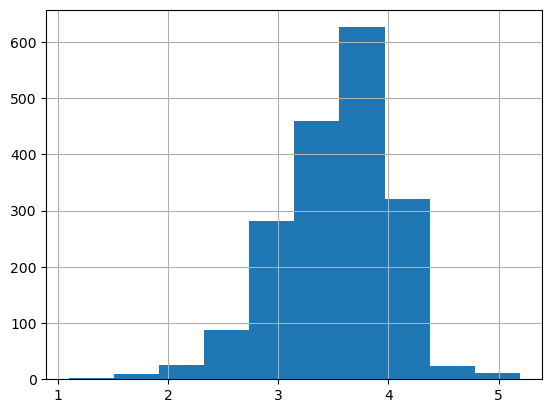

In [330]:
# Using the functions to check the distribution of transformed data
pd.Series(map(log_transfom_clean_, df_merged["Episode Duration"])).hist()
plt.show()

/var/folders/2x/t9dxtxdd28d5d8ddpkgy0y200000gq/T/ipykernel_10005/619705505.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_merged['Episode Duration'])


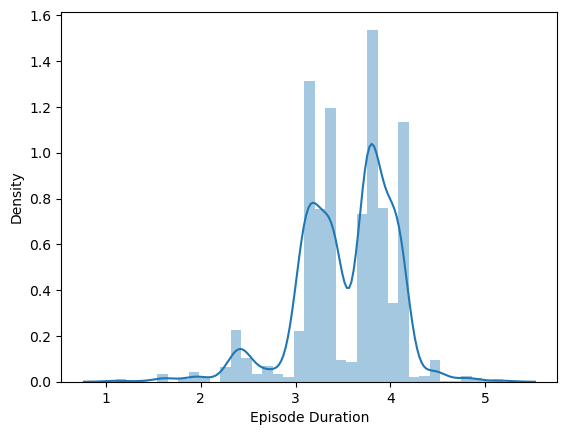

In [331]:
# Use log transformation to replace the values of the column now
df_merged['Episode Duration'] = list(map(log_transfom_clean_, df_merged['Episode Duration']))
sns.distplot(df_merged['Episode Duration'])
plt.show()

### RELEASE YEAR

Text(0.5, 1.0, 'Histograma')

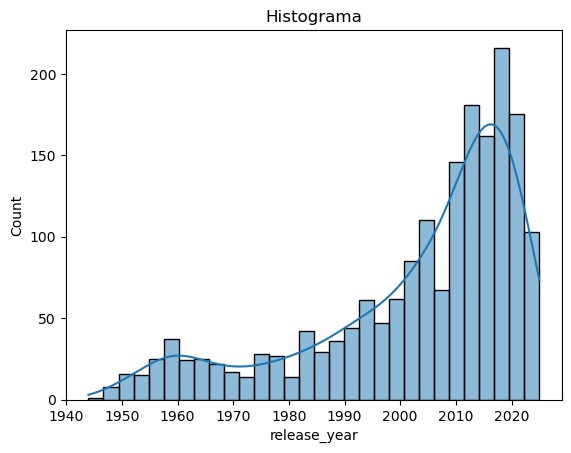

In [332]:
sns.histplot(data = df_merged, x= "release_year", bins = 30, kde = True)
plt.title(f"Histograma")

Text(0.5, 1.0, 'Boxplot')

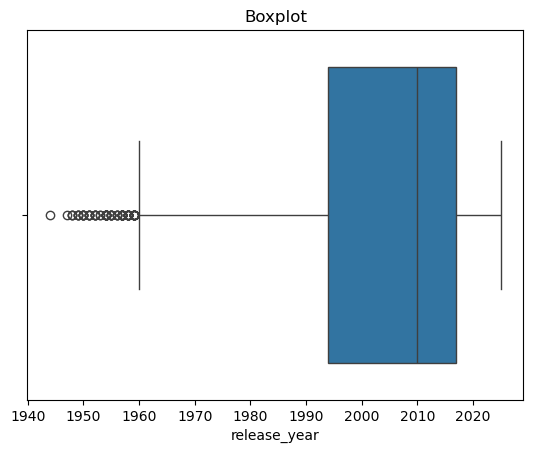

In [333]:
sns.boxplot(data = df_merged, x="release_year")
plt.title(f"Boxplot")

In [334]:
df_merged.dropna(subset="release_year", inplace = True)

In [335]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1839 entries, 1 to 1949
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               1839 non-null   object 
 1   Synopsis            1828 non-null   object 
 2   Genero              1839 non-null   object 
 3   Rating              1839 non-null   float64
 4   Popularity          1839 non-null   float64
 5   Vote Count          1839 non-null   float64
 6   In production       1839 non-null   bool   
 7   Status              1839 non-null   object 
 8   Number of Season    1839 non-null   float64
 9   Number of Episodes  1839 non-null   float64
 10  Episode Duration    1839 non-null   float64
 11  Where to Watch      1839 non-null   object 
 12  Reviews             1839 non-null   object 
 13  nominada            1839 non-null   float64
 14  win                 1839 non-null   bool   
 15  num_emmys           1839 non-null   float64
 16  release_yea

In [336]:
df_merged.sample(5)

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,nominada,win,num_emmys,release_year
1545,tales from the darkside,Tales from the Darkside is an anthology horror...,"Drama, Sci-Fi & Fantasy",7.200,4.031990,4.369448,False,Ended,1.386294,4.488636,2.995732,No platforms available,"Yeah, I do like the Anthology thing, I like th...",0.0,False,0.0,1984.0
1188,tacoma fd,There's not a lot of fires to fight in one of ...,Comedy,7.800,4.272449,4.276666,False,Canceled,1.386294,3.891820,3.135494,"Crave, Netflix basic with Ads, Netflix, tru TV",No reviews,0.0,False,0.0,2019.0
1372,becker,"Becker is a dedicated, outspoken and talented ...",Comedy,7.183,4.137500,4.812184,False,Ended,1.791759,4.859812,3.258097,No platforms available,No reviews,1.0,False,0.0,1998.0
1601,nobody wants this,An agnostic sex podcaster and a newly single r...,"Comedy, Drama",7.588,4.000437,4.955827,True,Returning Series,0.693147,2.302585,3.218876,"Netflix basic with Ads, Netflix",No reviews,0.0,False,0.0,2024.0
1559,interview with the vampire,"Louis de Pointe's epic story of love, blood, a...","Drama, Sci-Fi & Fantasy",7.426,4.023511,5.521461,True,Returning Series,1.098612,2.708050,3.912023,"Netflix basic with Ads, AMC+ Amazon Channel, S...","I have read Anne Rice's vampire novels, not al...",0.0,False,0.0,2022.0


In [337]:
df_merged.describe()

,Rating,Popularity,Vote Count,Number of Season,Number of Episodes,Episode Duration,nominada,num_emmys,release_year
count,1839.000000,1839.000000,1839.000000,1839.000000,1839.000000,1839.000000,1839.000000,1839.000000,1839.000000
mean,7.123043,4.592331,4.796479,1.450742,4.383634,3.536164,0.339315,0.920609,2002.982599
std,1.071127,0.652620,2.110335,0.853126,1.181936,0.500674,0.473606,3.666483,19.110888
min,1.000000,3.803569,0.000000,0.000000,0.693147,1.098612,0.000000,0.000000,1944.000000
25%,6.680000,4.081808,3.295837,0.693147,3.637586,3.218876,0.000000,0.000000,1994.000000
50%,7.300000,4.424020,4.976734,1.386294,4.394449,3.737670,0.000000,0.000000,2010.000000
75%,7.800000,4.928112,6.469488,1.945910,5.049856,3.912023,1.000000,0.000000,2017.000000
max,10.000000,7.161263,10.108874,4.394449,9.109967,5.192957,1.000000,66.000000,2025.000000


In [338]:
df_merged.to_csv('df_prediction_emmy.csv', index=False)


### Una vez hemos standardizado nuestras variables numericas volvemos a ver los graficos

In [339]:
num = ["Rating", "Popularity", "Vote Count", "Number of Season", "Number of Episodes", "Episode Duration","release_year"]


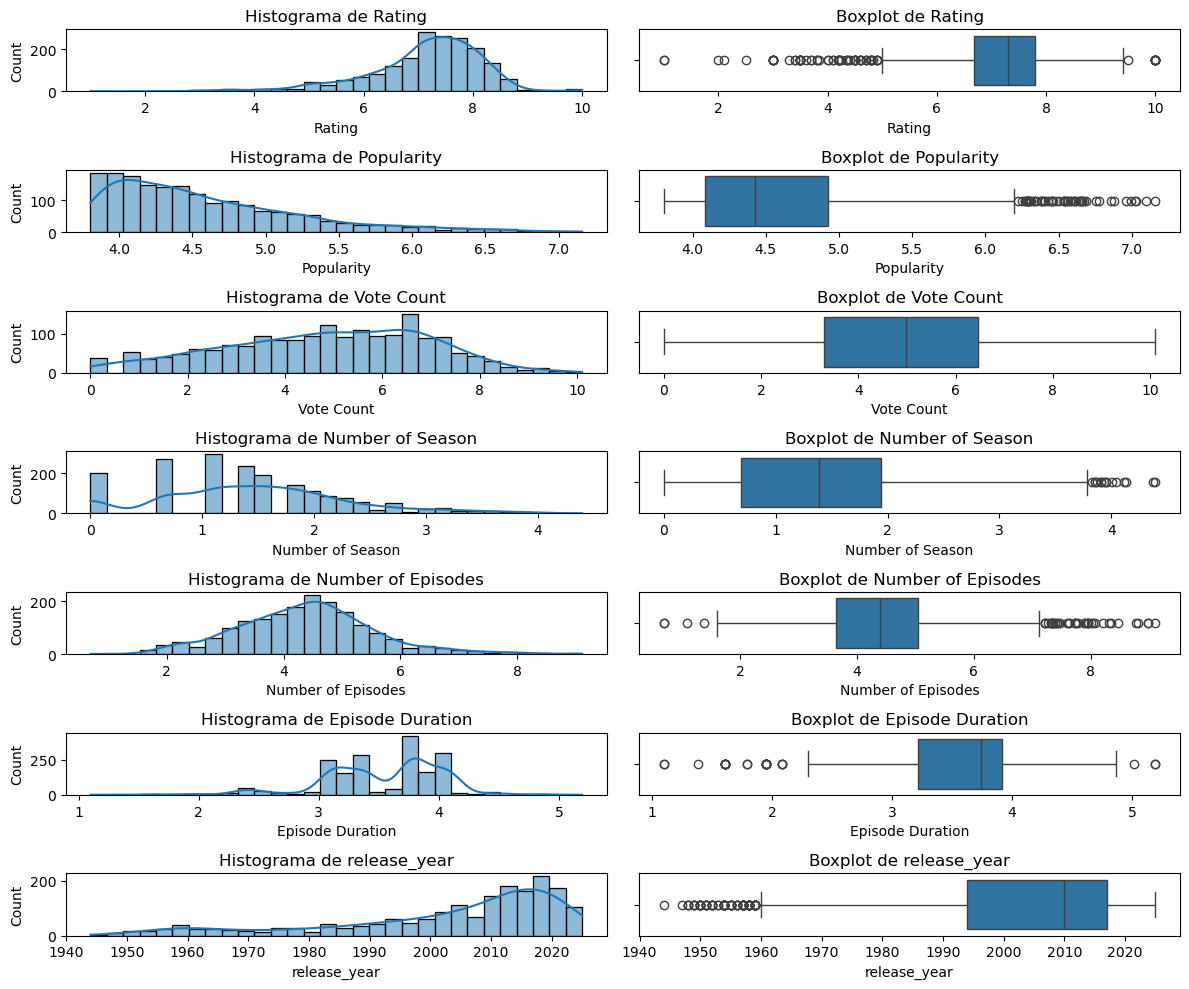

In [340]:
plt.figure(figsize=(12, 10))
for i, column in enumerate(num, 1):
    plt.subplot(len(num), 2, i*2-1)
    sns.histplot(df_merged[column], bins = 30, kde = True)
    plt.title(f"Histograma de {column}")

    plt.subplot(len(num), 2, i*2)
    sns.boxplot(x=df_merged[column])
    plt.title(f"Boxplot de {column}")

plt.tight_layout()
plt.show()

### miramos si hay multicolinealidad

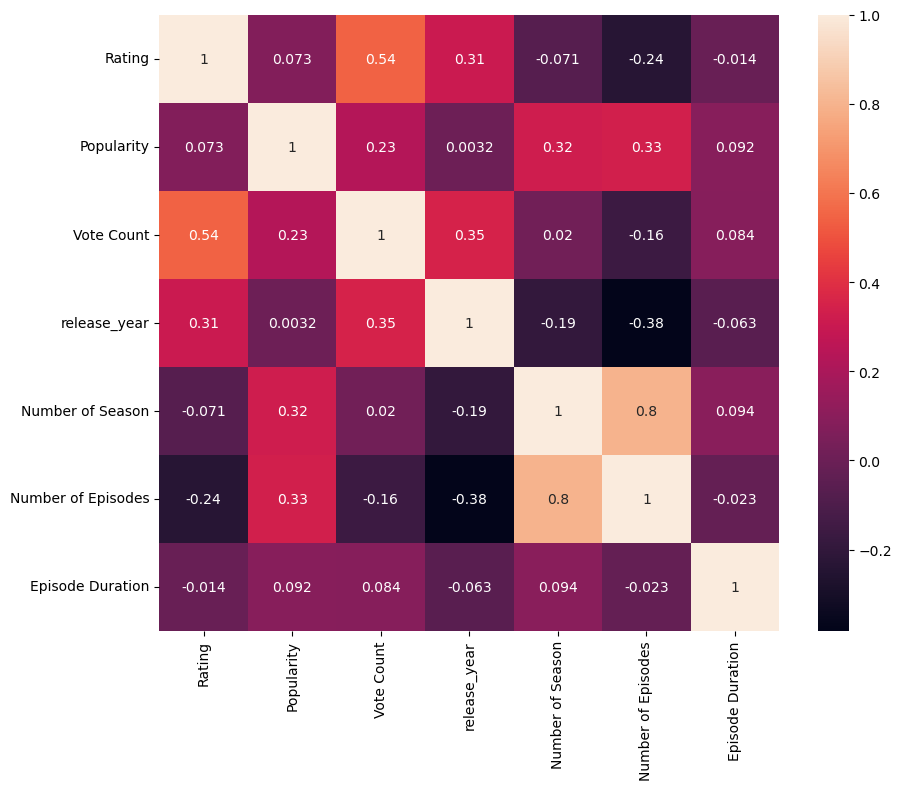

In [341]:
# miramos si hay multicolinealidad entre variables númericas
data_corr = df_merged[['Rating', 'Popularity', 'Vote Count', 'release_year', 'Number of Season', 'Number of Episodes', 'Episode Duration']]
corr_matrix=data_corr.corr(method='pearson')
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()
# no está la variable objetivo (win)


In [342]:
numericals = df_merged[['Rating', 'Popularity', 'Vote Count', 'release_year', 'Number of Season', 'Number of Episodes', 'Episode Duration']]

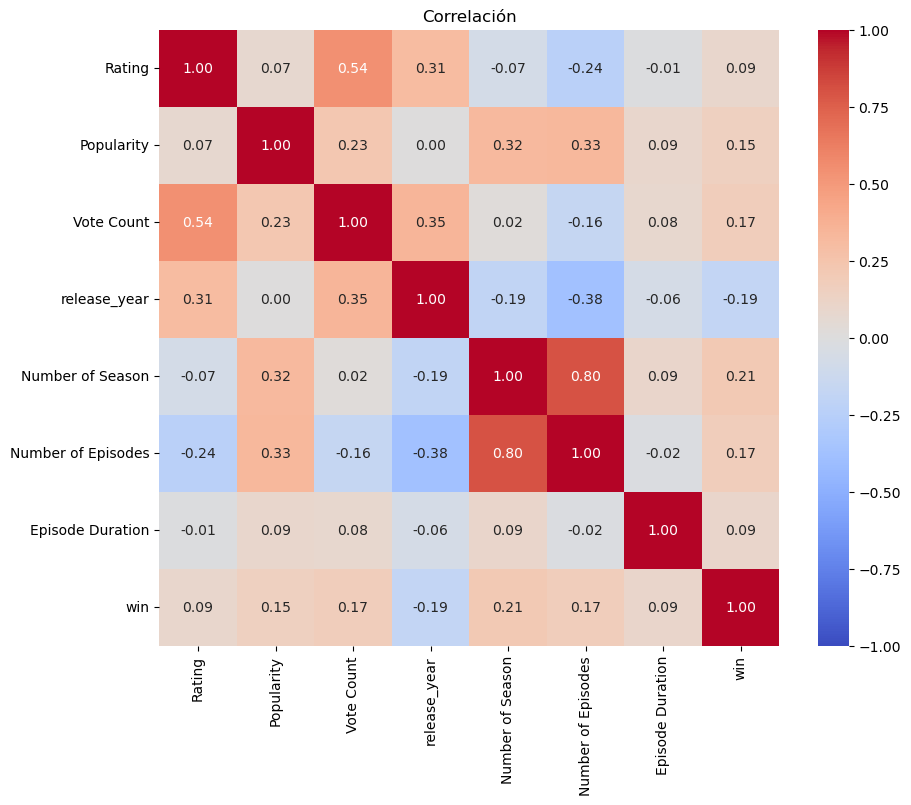

In [343]:
# hacemos una matriz de correlación con la variable Y también
correlation_matrix = pd.concat([numericals, df_merged["win"]], axis=1).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot= True, cmap= "coolwarm", fmt=".2f", vmin=-1)
plt.title("Correlación")
plt.show()
# hay poco correlación con la variable Y

### MIRAMOS VIF

In [344]:
# para cerciorarnos usamos VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Features"]= numericals.columns
vif_data["VIF"] = [variance_inflation_factor(numericals.values, i) for i in range(numericals.shape[1])]

print("Caracteristicas con VIF alot: \n", vif_data[vif_data["VIF"]>10]) # 10 es el umbral 

Caracteristicas con VIF alot: 
              Features         VIF
0              Rating   67.828020
1          Popularity   63.621937
3        release_year  176.268429
4    Number of Season   11.705696
5  Number of Episodes   47.919139
6    Episode Duration   52.533125


In [345]:
def calcular_vif(data):
    """Calcula el VIF para cada variable en el DataFrame."""
    vif_data = pd.DataFrame()
    vif_data["Variable"] = data.columns
    vif_data["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif_data

def eliminar_variables_vif(data, umbral=10):
    """
    Elimina las variables con el mayor VIF de forma iterativa 
    hasta que todas las variables tengan un VIF inferior al umbral.
    """
    iteracion = 1
    while True:
        print(f"\n--- Iteración {iteracion} ---")
        

        vif_data = calcular_vif(data)
        print(vif_data)
        
        max_vif = vif_data["VIF"].max()
        if max_vif < umbral:
            print("\n✅ Todas las variables tienen VIF menor que", umbral)
            break
        

        variable_a_eliminar = vif_data.loc[vif_data['VIF'].idxmax(), 'Variable']
        print(f"\n⚠️ Se eliminará la variable con mayor VIF: {variable_a_eliminar} (VIF={max_vif})")
        
        data = data.drop(columns=[variable_a_eliminar])
        
        iteracion += 1
        
    print("\n📊 Proceso finalizado. Variables restantes:")
    print(data.columns)
    return data, vif_data

numericals_final, vif_final = eliminar_variables_vif(numericals, umbral=10)


--- Iteración 1 ---
             Variable         VIF
0              Rating   67.828020
1          Popularity   63.621937
2          Vote Count    9.667058
3        release_year  176.268429
4    Number of Season   11.705696
5  Number of Episodes   47.919139
6    Episode Duration   52.533125

⚠️ Se eliminará la variable con mayor VIF: release_year (VIF=176.26842907830502)

--- Iteración 2 ---
             Variable        VIF
0              Rating  42.187992
1          Popularity  54.981944
2          Vote Count   9.394226
3    Number of Season  10.239394
4  Number of Episodes  39.971146
5    Episode Duration  35.514101

⚠️ Se eliminará la variable con mayor VIF: Popularity (VIF=54.98194355355569)

--- Iteración 3 ---
             Variable        VIF
0              Rating  37.991481
1          Vote Count   9.019559
2    Number of Season  10.018486
3  Number of Episodes  31.313428
4    Episode Duration  30.163232

⚠️ Se eliminará la variable con mayor VIF: Rating (VIF=37.99148083573303)


In [346]:
# según el VIF, variance inflation factor
# las variables year y popularity están muy correlacionadas con otras, generan ruido

### PROBAMOS CON KBEST

In [347]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2
# la Y tiene que ser categorica

k= 5
selector = SelectKBest(score_func=f_classif, k=k) # especific si es ANOVA(numericas)/CHI2(categoricas), la k
# variables categoricas: score_func=chi2

numericals_selected = selector.fit_transform(numericals, df_merged["win"])


selected_features = numericals.columns[selector.get_support()]
print("Caracteristicas Seleccionadas:", selected_features.tolist())

Caracteristicas Seleccionadas: ['Popularity', 'Vote Count', 'release_year', 'Number of Season', 'Number of Episodes']


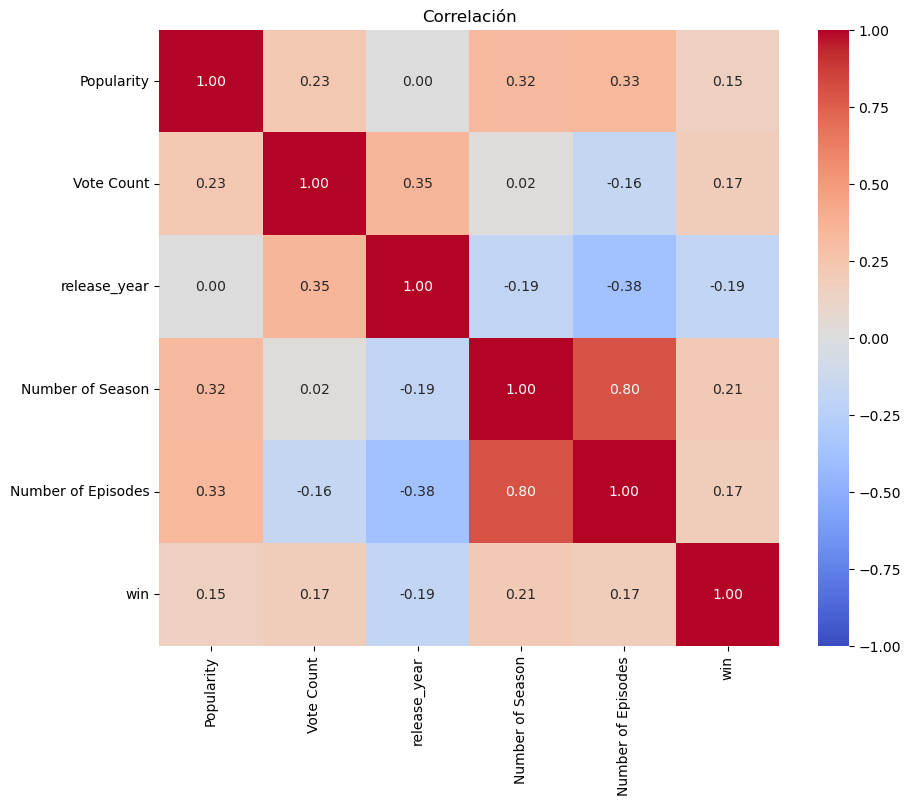

In [348]:
# hacemos una matriz de correlación con la variable Y también
correlation_matrix = pd.concat([numericals[selected_features], df_merged["win"]], axis=1).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot= True, cmap= "coolwarm", fmt=".2f", vmin=-1)
plt.title("Correlación")
plt.show()
# hay poco correlación con la variable Y


### por último probamos ANOVA

In [349]:
from sklearn.feature_selection import f_classif

f_values, p_values = f_classif(numericals, df_merged["win"]) # win es categorica
# relación X numericas, Y categorica

for feature, f_val, p_val in zip(numericals.columns, f_values, p_values):
    print(f"Variable: {feature}, F-value: {f_val:.2f}, P-value: {p_val:.3f}")

# qué variables importan y cuales no en el modelo

# F-value alto y p-value bajo: la variable numerica tiene incidencia sobre la Y
# el umbral del p-value suele estar en <0.05 (nivel de significancia)

# H0 la variable NO tiene incidencia en el modelo - LA HIPOTESIS NULA SUCEDE 12,7% DE VECES, NO LA PUEDO RECHAZAR
# H1 la variable SÍ tiene incidencia en el modelo

# primero mira el p valor y luego el F valor y se queda con el F valor más alto
# Cuanto más alto sea el F-value, mayor será la relación entre la variable y la categoría objetivo.
#P-values: Este valor indica la probabilidad de que el resultado observado haya ocurrido por casualidad. 
# Si el p-value es bajo (típicamente menor que 0.05), se rechaza la hipótesis nula, 
# lo que sugiere que la variable tiene una relación significativa con la variable dependiente.

# BASICAMENTE:
#F-value alto y p-value bajo (<0.05): Indica que esa variable tiene una relación significativa con la variable dependiente. 
# Esta es una variable importante para el modelo.
# F-value bajo y p-value alto (>0.05): Indica que la variable no tiene una relación significativa con la variable dependiente. 
# podemos considerar eliminar esta variable de tu modelo.


Variable: Rating, F-value: 14.25, P-value: 0.000
Variable: Popularity, F-value: 43.61, P-value: 0.000
Variable: Vote Count, F-value: 58.01, P-value: 0.000
Variable: release_year, F-value: 66.36, P-value: 0.000
Variable: Number of Season, F-value: 87.66, P-value: 0.000
Variable: Number of Episodes, F-value: 56.08, P-value: 0.000
Variable: Episode Duration, F-value: 16.44, P-value: 0.000


In [350]:
numericals

,Rating,Popularity,Vote Count,release_year,Number of Season,Number of Episodes,Episode Duration
1,4.368,7.161263,2.944439,2007.0,1.609438,6.510258,3.401197
2,5.500,7.093905,1.791759,2011.0,1.945910,7.113956,4.094345
3,5.078,7.028138,5.075174,2002.0,2.708050,6.340359,4.442651
4,4.200,7.020924,2.639057,2018.0,1.791759,6.204558,3.218876
5,8.200,6.996062,9.246672,2005.0,3.044522,6.086775,3.761200
...,...,...,...,...,...,...,...
1945,6.900,3.806507,6.762730,2015.0,1.386294,4.204693,3.091042
1946,7.002,3.805106,5.379897,1961.0,0.693147,4.574711,1.945910
1947,8.000,3.804839,1.791759,2017.0,0.693147,4.356709,3.091042
1948,7.000,3.804260,4.709530,1994.0,1.791759,4.955827,3.737670


## VARIABLES CATEGORICAS

### 1. GENEROS

In [351]:
df_merged["Genero"] # tengo los generos en una string juntos

1                          News, Comedy
2                                  Talk
3                               Reality
4                                Family
5                                 Drama
                     ...               
1945                      Drama, Comedy
1946    Animation, Comedy, Family, Kids
1947                    Animation, Kids
1948                              Drama
1949                      Comedy, Drama
Name: Genero, Length: 1839, dtype: object

In [352]:
# quiero sacar los generos unicos, para ello tengo que hacer split
# cojo cada genero que está después de la coma
df_merged["Genero"] = df_merged["Genero"].apply(lambda x: x.split(', ') if isinstance(x, str) else x) 
# antes del explode necesito hacer un split porque los generos son strings
# con el split cada genero individual es un string
df_merged["Genero"] # ahora los generos son listas de strings ["Talk", "Comedy", "News"]

1                          [News, Comedy]
2                                  [Talk]
3                               [Reality]
4                                [Family]
5                                 [Drama]
                      ...                
1945                      [Drama, Comedy]
1946    [Animation, Comedy, Family, Kids]
1947                    [Animation, Kids]
1948                              [Drama]
1949                      [Comedy, Drama]
Name: Genero, Length: 1839, dtype: object

In [353]:
# divido los generos combinados en filas separadas con el explode
# quiero conseguir los generos únicos
generos_exploded = df_merged.explode("Genero")
generos_exploded["Genero"]


1            News
1          Comedy
2            Talk
3         Reality
4          Family
          ...    
1947    Animation
1947         Kids
1948        Drama
1949       Comedy
1949        Drama
Name: Genero, Length: 3952, dtype: object

In [354]:
# cuento los generos unicos
generos_count = generos_exploded["Genero"].value_counts(dropna = False)
generos_count.columns = ['Genero', 'Total']
generos_count

Genero
Drama                 850
Comedy                728
Action & Adventure    345
Sci-Fi & Fantasy      337
Animation             320
Crime                 277
Family                245
Kids                  195
Mystery               179
Reality               159
Talk                   93
Documentary            76
Western                47
Soap                   44
News                   31
War & Politics         25
Desconocido             1
Name: count, dtype: int64

In [355]:
df_merged[df_merged["Genero"].isna()] # no hay nulos

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,nominada,win,num_emmys,release_year


In [356]:
# agrupamos los generos en 7
agrupacion_generos = {
    "Crime": "Drama",
    "Sci-Fi & Fantasy": "Action & Adventure",
    "Mystery": "Action & Adventure", 
    "Kids":"Family",
    "Reality": "Entertainment",
    "Talk": "Entertainment",
    "Western": "Documentary",
    "Soap": "Drama",
    "War & Politics": "Documentary",
    "News":"Entertainment",
    "Desconocido": "Entertainment"}

In [357]:
df_merged["Genero"]

1                          [News, Comedy]
2                                  [Talk]
3                               [Reality]
4                                [Family]
5                                 [Drama]
                      ...                
1945                      [Drama, Comedy]
1946    [Animation, Comedy, Family, Kids]
1947                    [Animation, Kids]
1948                              [Drama]
1949                      [Comedy, Drama]
Name: Genero, Length: 1839, dtype: object

In [358]:
# Función para mapear los géneros 
def map_generos(lista_generos, agrupacion_generos):
    
    # Aplicamos el mapeo de cada género individualmente
    genero_mapped = []
    for genero in lista_generos:
        if genero in agrupacion_generos:
            genero_mapped.append(agrupacion_generos[genero])
        else:
            genero_mapped.append(genero)

    return list(set(genero_mapped))

# Convertimos los géneros de una lista a su categoría agrupada
df_merged["Genero_agrup"] = df_merged["Genero"].apply(lambda x: map_generos(x, agrupacion_generos))


In [359]:
df_merged["Genero_agrup"]

1           [Comedy, Entertainment]
2                   [Entertainment]
3                   [Entertainment]
4                          [Family]
5                           [Drama]
                   ...             
1945                [Comedy, Drama]
1946    [Comedy, Animation, Family]
1947            [Animation, Family]
1948                        [Drama]
1949                [Comedy, Drama]
Name: Genero_agrup, Length: 1839, dtype: object

In [360]:
# ahora quiero crear 7 columnas adicionales booleanas (una para cada genero) 
# que sean 1 si esa serie tiene ese genero y 0 si la serie no es de ese genero

In [361]:
# Listado de géneros posibles
genres = ["Drama", "Comedy", "Action & Adventure", "Animation", "Family", "Entertainment", "Documentary"]

# Crear las columnas de género con 1 si el género está presente, 0 si no
for genre in genres:
    df_merged[genre] = df_merged["Genero_agrup"].apply(lambda x: 1 if genre in x else 0)

In [362]:
df_merged.drop(columns=["Genero"], inplace=True)


In [363]:
df_merged.head(2)

,Title,Synopsis,Rating,Popularity,Vote Count,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,nominada,win,num_emmys,release_year,Genero_agrup,Drama,Comedy,Action & Adventure,Animation,Family,Entertainment,Documentary
1,tmz,"Based on the popular gossip website, this ente...",4.368,7.161263,2.944439,True,Returning Series,1.609438,6.510258,3.401197,fuboTV,No reviews,0.0,False,0.0,2007.0,"[Comedy, Entertainment]",0,1,0,0,0,1,0
2,the chew,The Chew is an American talk show/cooking show...,5.500,7.093905,1.791759,False,Ended,1.945910,7.113956,4.094345,No platforms available,No reviews,0.0,False,0.0,2011.0,[Entertainment],0,0,0,0,0,1,0


In [364]:
df_genero_dummies = df_merged[["Drama", "Comedy", "Action & Adventure", "Family", "Animation","Entertainment", "Documentary" ]]

In [365]:
# random forest es un modelo muy potente para sacar la feature importance (se puede utilizar para regresión linear también)
# transformar modelos que te retornan valores númericos a categoricos
# Sigmoid: función

### 2. SENTIMENT LABEL

In [366]:
## quiero añadir 3 columnas que me indique el sentiment label basado en las reseñas o si no las hay en la sinopsis

In [367]:
import re
import nltk
nltk.download('punkt')  # Necesario para la tokenización
from nltk.tokenize import word_tokenize

from nltk.corpus import stopwords # stopwords, palabras vacías
nltk.download('stopwords')

import spacy # lematización

nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package punkt to /Users/caterina/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/caterina/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/caterina/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [368]:
df_merged["Synopsis"].isna().sum()

11

In [369]:
df_merged.dropna(subset="Synopsis", inplace=True)

In [370]:
# Limpiar el texto (reseñas de moemnto)
def clean_text(text):
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar caracteres no alfabéticos (números y puntuación)
    text = re.sub(r'http\S+', '', text)  # Eliminar URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Eliminar caracteres no alfabéticos (números, símbolos)
    text = text.strip()  # Eliminar espacios extra
    return text

df_merged["cleaned_sinopsis"] = df_merged["Synopsis"].apply(clean_text)

In [371]:
# aplicamos tokenización
# dividimos le texto en palabras individuales o tokens
df_merged['tokens'] = df_merged['cleaned_sinopsis'].apply(word_tokenize)

In [372]:
# eliminamos las palabras "vacías", que no aportan significado
# Crear un conjunto de stopwords en español
stop_words = set(stopwords.words('english'))

# Eliminar stopwords de cada reseña
df_merged['tokens_clean'] = df_merged['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

In [373]:
sia = SentimentIntensityAnalyzer()

# Función para obtener el sentimiento del texto
def get_sentiment(text):
    sentiment_score = sia.polarity_scores(text)  # Da un diccionario con scores de sentimiento
    return sentiment_score["compound"]  # 'compound' es una puntuación agregada

# Función para obtener la etiqueta de sentimiento
def get_sentiment_label(score):
    if score > 0.05:
        return "positive"
    elif score < -0.05:
        return "negative"
    else:
        return "neutral"
    
# Función que devulve el sentiment score y el sentiment label
def apply_sentiment(row):
        
    sentiment_score = get_sentiment(row["Synopsis"])
    
    # Obtener el label de sentimiento
    sentiment_label = get_sentiment_label(sentiment_score)
    
    return pd.Series([sentiment_score, sentiment_label])

In [374]:
# Aplicamos el análisis de sentimiento a cada fila
df_merged[["Sentiment_Score", "Sentiment_Label"]] = df_merged.apply(apply_sentiment, axis=1)


In [375]:
df_sentiment_dummies = pd.get_dummies(df_merged["Sentiment_Label"], prefix="Sentiment", drop_first=True)


In [376]:
df_sentiment_dummies.isna().sum()

Sentiment_neutral     0
Sentiment_positive    0
dtype: int64

In [377]:
categoricals= pd.concat([df_genero_dummies, df_sentiment_dummies], axis=1)
categoricals.dropna(subset=["Sentiment_neutral", "Sentiment_positive"], inplace=True) # eliminado 11

In [378]:
categoricals

,Drama,Comedy,Action & Adventure,Family,Animation,Entertainment,Documentary,Sentiment_neutral,Sentiment_positive
1,0,1,0,0,0,1,0,False,True
2,0,0,0,0,0,1,0,False,True
3,0,0,0,0,0,1,0,False,True
4,0,0,0,1,0,0,0,True,False
5,1,0,0,0,0,0,0,False,True
...,...,...,...,...,...,...,...,...,...
1945,1,1,0,0,0,0,0,False,False
1946,0,1,0,1,1,0,0,False,True
1947,0,0,0,1,1,0,0,False,True
1948,1,0,0,0,0,0,0,False,False


### CHI CUADRADO mide la independencia entre variables categoricas y el target

In [379]:
from sklearn.feature_selection import chi2
import pandas as pd

# encodign
chi2_values, p_values = chi2(categoricals, df_merged["win"]) 

for feature, chi2val, p_val in zip(categoricals.columns, chi2_values, p_values):
    print(f"Variable: {feature}, Chi2: {chi2val:.2f}, P-value: {p_val:.3f}")

# chi2 alto y p valor bajo: las variables categoricas están relacionadas con la Y

Variable: Drama, Chi2: 7.71, P-value: 0.005
Variable: Comedy, Chi2: 7.17, P-value: 0.007
Variable: Action & Adventure, Chi2: 1.61, P-value: 0.204
Variable: Family, Chi2: 10.25, P-value: 0.001
Variable: Animation, Chi2: 20.04, P-value: 0.000
Variable: Entertainment, Chi2: 6.14, P-value: 0.013
Variable: Documentary, Chi2: 0.02, P-value: 0.892
Variable: Sentiment_neutral, Chi2: 0.09, P-value: 0.759
Variable: Sentiment_positive, Chi2: 0.44, P-value: 0.505


In [380]:
# P-value < 0.05: Se rechaza la hipótesis nula. 
# Esto indica que hay una relación estadísticamente significativa entre la variable X y la variable dependiente Y. 
# Estas variables son relevantes: Drama, Comedy, Family, Animation, Entertainment

### KBEST

In [381]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2
# la Y tiene que ser categorica

k= 4
selector = SelectKBest(score_func=chi2, k=k) # especific si es ANOVA(numericas)/CHI2(categoricas), la k
# variables categoricas: score_func=chi2

categorical_selected = selector.fit_transform(categoricals, df_merged["win"])


selected_features = categoricals.columns[selector.get_support()]
print("Caracteristicas Seleccionadas:", selected_features.tolist())

Caracteristicas Seleccionadas: ['Drama', 'Comedy', 'Family', 'Animation']


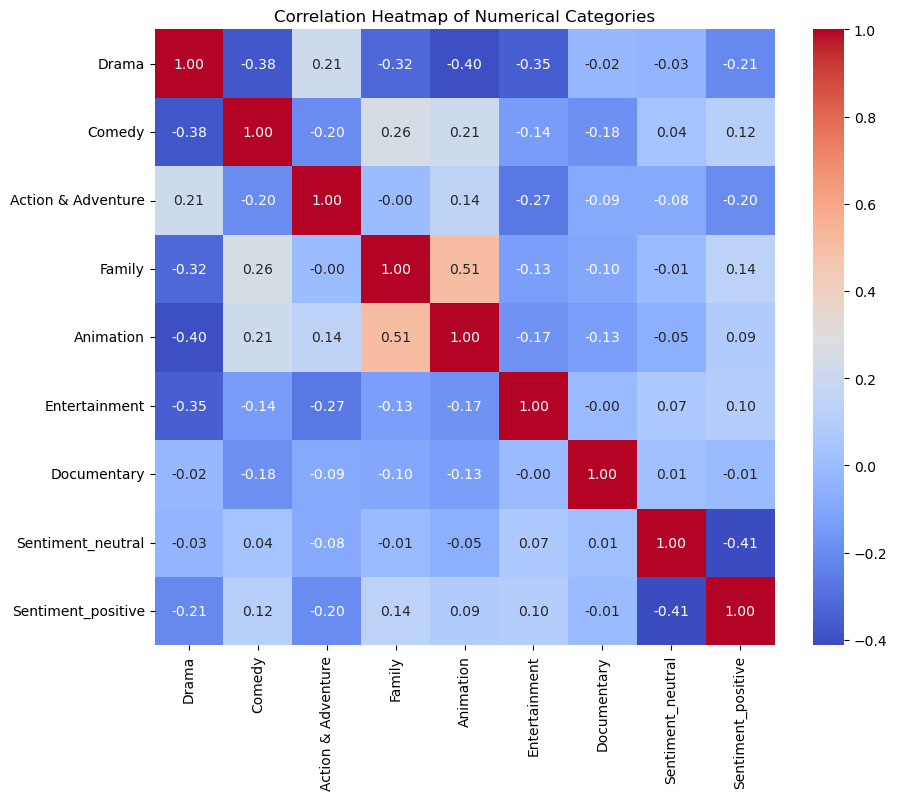

In [382]:
correlation_matrix = categoricals.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Categories')
plt.show()

In [383]:
df_modelo = pd.get_dummies(df_merged, columns=["Sentiment_Label"], drop_first=True)

In [384]:
df_modelo.sample()

,Title,Synopsis,Rating,Popularity,Vote Count,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,nominada,win,num_emmys,release_year,Genero_agrup,Drama,Comedy,Action & Adventure,Animation,Family,Entertainment,Documentary,cleaned_sinopsis,tokens,tokens_clean,Sentiment_Score,Sentiment_Label_neutral,Sentiment_Label_positive
337,white collar,"In exchange for his freedom, charming con arti...",8.3,5.176607,7.243513,False,Ended,1.791759,4.394449,3.73767,"Amazon Prime Video with Ads, Hulu, Sky Go, Hot...",I just finished watching _White Collar_ for th...,0.0,False,0.0,2009.0,"[Drama, Action & Adventure]",1,0,1,0,0,0,0,in exchange for his freedom charming con artis...,"[in, exchange, for, his, freedom, charming, co...","[exchange, freedom, charming, con, artist, nea...",0.7906,False,True


In [385]:
df_modelo

,Title,Synopsis,Rating,Popularity,Vote Count,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,nominada,win,num_emmys,release_year,Genero_agrup,Drama,Comedy,Action & Adventure,Animation,Family,Entertainment,Documentary,cleaned_sinopsis,tokens,tokens_clean,Sentiment_Score,Sentiment_Label_neutral,Sentiment_Label_positive
1,tmz,"Based on the popular gossip website, this ente...",4.368,7.161263,2.944439,True,Returning Series,1.609438,6.510258,3.401197,fuboTV,No reviews,0.0,False,0.0,2007.0,"[Comedy, Entertainment]",0,1,0,0,0,1,0,based on the popular gossip website this enter...,"[based, on, the, popular, gossip, website, thi...","[based, popular, gossip, website, entertainmen...",0.9081,False,True
2,the chew,The Chew is an American talk show/cooking show...,5.500,7.093905,1.791759,False,Ended,1.945910,7.113956,4.094345,No platforms available,No reviews,0.0,False,0.0,2011.0,[Entertainment],0,0,0,0,0,1,0,the chew is an american talk showcooking show ...,"[the, chew, is, an, american, talk, showcookin...","[chew, american, talk, showcooking, show, airs...",0.8658,False,True
3,american idol,"Each year, hopeful singers from all over the c...",5.078,7.028138,5.075174,False,Ended,2.708050,6.340359,4.442651,Tivify,"American idol, a season and series juggernaut,...",1.0,True,8.0,2002.0,[Entertainment],0,0,0,0,0,1,0,each year hopeful singers from all over the co...,"[each, year, hopeful, singers, from, all, over...","[year, hopeful, singers, country, audition, pa...",0.5106,False,True
4,america says,"In this family-friendly game show, two teams f...",4.200,7.020924,2.639057,True,Returning Series,1.791759,6.204558,3.218876,fuboTV,No reviews,0.0,False,0.0,2018.0,[Family],0,0,0,0,1,0,0,in this familyfriendly game show two teams fac...,"[in, this, familyfriendly, game, show, two, te...","[familyfriendly, game, show, two, teams, face,...",0.0000,True,False
5,grey's anatomy,Follows the personal and professional lives of...,8.200,6.996062,9.246672,True,Returning Series,3.044522,6.086775,3.761200,"Hulu, Hotstar, Kinopoisk, Amazon Prime Video, ...",Worst show ever. Shonda needs to stop right NO...,1.0,True,5.0,2005.0,[Drama],1,0,0,0,0,0,0,follows the personal and professional lives of...,"[follows, the, personal, and, professional, li...","[follows, personal, professional, lives, group...",0.0516,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1945,the last man on earth,"The year is 2022, and after an unlikely event,...",6.900,3.806507,6.762730,False,Canceled,1.386294,4.204693,3.091042,"Hulu, Sky Go, Tele2 Play, Disney Plus, TV 2 Play",Contains spoilers of the first season.\r\n\r\n...,1.0,False,0.0,2015.0,"[Comedy, Drama]",1,1,0,0,0,0,0,the year is and after an unlikely event only ...,"[the, year, is, and, after, an, unlikely, even...","[year, unlikely, event, one, man, left, earth,...",-0.0772,False,False
1946,the yogi bear show,"From his home in Jellystone Park, Yogi Bear dr...",7.002,3.805106,5.379897,False,Ended,0.693147,4.574711,1.945910,"Max, Max Amazon Channel, HBO Max",No reviews,0.0,False,0.0,1961.0,"[Comedy, Animation, Family]",0,1,0,1,1,0,0,from his home in jellystone park yogi bear dre...,"[from, his, home, in, jellystone, park, yogi, ...","[home, jellystone, park, yogi, bear, dreams, n...",0.2638,False,True
1947,pete the cat,"Along with his pals - Callie Cat, Grumpy Toad,...",8.000,3.804839,1.791759,True,Returning Series,0.693147,4.356709,3.091042,No platforms available,No reviews,0.0,False,0.0,2017.0,"[Animation, Family]",0,0,0,1,1,0,0,along with his pals callie cat grumpy toad sa...,"[along, with, his, pals, callie, cat, grumpy, ...","[along, pals, callie, cat, grumpy, toad, sally...",0.4939,False,True
1948,party of five,Five brothers and sisters are determined to st...,7.000,3.804260,4.709530,False,Ended,1.791759,4.955827,3.737670,"O2 TV, Amazon Prime Video, MovistarTV",Incredibly well-acted. Emotional

In [386]:
df_modelo2 = df_modelo[["Rating", "Popularity", "Vote Count","Number of Season", "Number of Episodes", "Episode Duration", "win", "Drama", "Comedy", "Animation", "Family"]]

### DATA IMBALANCE

In [387]:
df_modelo["win"].value_counts()

win
False    1505
True      323
Name: count, dtype: int64

1. Separamos mi variable objetivo y las features

In [388]:
y = df_modelo["win"]
X = df_modelo[["Rating", "Popularity", "Vote Count", "Number of Season","Number of Episodes","Episode Duration", "Comedy", "Drama", "Family", "Animation" ]]

2. Como tenemos data imbalance en mi variable objetivo, vamos a aplicar TOMEKLINKS para equilibrar los datos

In [390]:
from imblearn.under_sampling import TomekLinks
tl = TomekLinks()
X_tl, y_tl = tl.fit_resample(X, y)
y_tl.value_counts()

win
False    1406
True      323
Name: count, dtype: int64

3. Dividimos en entrenamiento y test

In [391]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tl, y_tl, test_size=0.2, random_state=42)  


4. Entrenamos el modelo

### LOGISTIC REGRESSION 0.70

In [392]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42) # fit sirve apar que el modelo se adapte a mis datos
model.fit(X_train, y_train) # el modelo se adapta a unas caracteristica
# transform se usa parea transformar los datos según la premisa que le acabo de pasar (scalin, normalizing, standarazing)
# transformar los datos para hacerlos más legibles

LogisticRegression(random_state=42)

5. Evaluamos el modelo

In [393]:
# resultado final del modelo
model.score(X_test, y_test) # el score es la accuracy
# en modelo de clasificación las metricas no son las mismas
# nuestro modelo ha acertado un 70% de las veces (accuracy: cantidad de veces que aciertas respecto a la cantidad de veces que fallas)

0.8236994219653179

In [394]:
from sklearn.metrics import classification_report
y_predicted = model.predict(X_test)
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

       False       0.84      0.98      0.90       283
        True       0.56      0.14      0.23        63

    accuracy                           0.82       346
   macro avg       0.70      0.56      0.56       346
weighted avg       0.79      0.82      0.78       346



**Precision**: Precision is the ratio of true positive predictions to the total positive predictions. It measures the accuracy of positive predictions. 
​
 
**Recall** (Sensitivity): Recall measures the ratio of true positive predictions to the total actual positives. It calculates the ability of the classifier to find all positive instances.
 
**F1-Score**: The F1-score is the harmonic mean of precision and recall. It gives a balance between precision and recall.


**Support**: Support is the number of actual occurrences of the class in the specified dataset. It's simply the number of samples belonging to each class.

**Accuracy**: Accuracy is the ratio of correctly predicted observations to the total observations. It gives an overall performance of the model. 
(TP + TN) / TO

Confusion Matrix

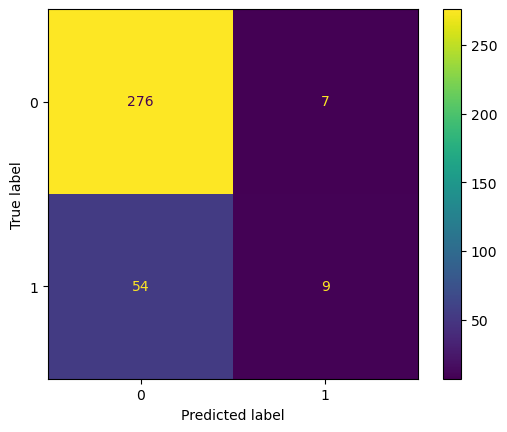

In [395]:
%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_predicted)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Otra forma de ver cuan bueno es un modelo: ROC CURVE

/opt/anaconda3/envs/original/lib/python3.12/site-packages/sklearn/metrics/_plot/roc_curve.py:171: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


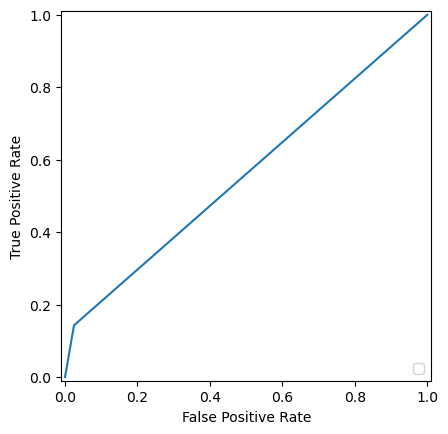

In [396]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

fpr, tpr, thresholds = roc_curve(y_test, y_predicted) #y_test, y_test
display = RocCurveDisplay(fpr=fpr, tpr=tpr)
display.plot()
plt.show()

In [397]:
coeficients = model.coef_.tolist()[0]
names = model.feature_names_in_.tolist()

In [398]:
pd.DataFrame({"Names": names, "Coefficients": coeficients})
# cuando el rating aumenta tienes más opciones de ganar
# si hay más episodios y las series duran más tienes más posibilidad de ganar
# en cambio si la popularidad sube hay menos posibilidades
# los coeficientes son las Betas
# habla del cambio unitario, male solo cambia de 0 a 1 pero Fare cambia de mucho
# bien para determinar el impacto unitario 


,Names,Coefficients
0,Rating,0.161414
1,Popularity,0.000445
2,Vote Count,0.252390
3,Number of Season,0.517528
4,Number of Episodes,0.297761
5,Episode Duration,0.579232
6,Comedy,1.176767
7,Drama,0.561880
8,Family,-0.425252
9,Animation,-0.626985


### KNN MODEL 0.84

These are the basic particularities: 

- `Instance-based`: It does not learn. It memorizes where every point of the dataset is and uses them to make predictions at runtime
- `Distance metric`: The choice of the distance metric (Euclidian, Manhattan...) determines how "close" two data points are in the feature space. 
- `Hyperparameter K`: **K** is the number of neighbours considered. It affects the model's performance: the least the K the greater the flexibility, but it increases its sensitivity to noise. 
- `Feature Scaling`: As the scale of features amplifies its distance measures, it is really important to Normalize or Scale its data. 

*Problems*
- *`Noisy Data`* KNN Performs poorly with a lot of irrelevant features or "strange" data, AKA outliers
- *`Curse of Dimensionality`*: Degrade significantly as the number of dimensions increases

In [399]:
from sklearn.neighbors import KNeighborsClassifier

#X = df_modelo[["Rating", "Popularity", "Vote Count", "Number of Season","Number of Episodes","Episode Duration", "Comedy", "Drama", "Family", "Animation" ]]
#Y = df_merged["win"]

X_train, X_test, y_train, y_test = train_test_split(X_tl, y_tl, test_size=0.2, random_state=42)  

# Initialize and train the KNN classifier // funciona con menos features(4/5) y menos neighbors(3)
knn_model = KNeighborsClassifier(n_neighbors=4)  # Using 4 neighbors
knn_model.fit(X_train, y_train)

# Evaluate the model
accuracy = knn_model.score(X_test, y_test)
print("Accuracy of KNN classifier:", accuracy)

Accuracy of KNN classifier: 0.8352601156069365


#### vamos a quitar alguna feature, pero vemos que empeora

In [400]:
X = df_modelo[["Rating", "Popularity", "Vote Count", "Episode Duration", "Comedy", "Drama"]]
y = df_modelo["win"]

from imblearn.under_sampling import TomekLinks
tl = TomekLinks()
X_tl, y_tl = tl.fit_resample(X, y)
y_tl.value_counts()

X_train, X_test, y_train, y_test = train_test_split(X_tl, y_tl, test_size=0.2, random_state=42)  

# Initialize and train the KNN classifier // funciona con menos features(4/5) y menos neighbors(3)
knn_model = KNeighborsClassifier(n_neighbors=4)  # Using 4 neighbors
knn_model.fit(X_train, y_train)

# Evaluate the model
accuracy = knn_model.score(X_test, y_test)
print("Accuracy of KNN classifier:", accuracy)

Accuracy of KNN classifier: 0.7865497076023392


### probamos a usar diferentes metricas, n vecinos etc.

In [401]:
metrics=["euclidean", "chebyshev", "manhattan"]
n=[3, 4, 5, 7]
size=[0.1, 0.2, 0.3,  0.4]

In [402]:
acc=0
right_size=0.0
metric="aaa"
neighbors=17
for i in range(len(metrics)):
    for j in range(len(n)):
        for k in range(len(size)):
            X_train, X_test, y_train, y_test = train_test_split(X_tl, y_tl, test_size=size[k], random_state=42)

            knn_model = KNeighborsClassifier(n_neighbors=n[j], metric=metrics[i]) 
            knn_model.fit(X_train, y_train)

            accuracy = knn_model.score(X_test, y_test)
            print(f"Accuracy of KNN classifier with {size[k]} Test_size, with {n[j]} number of neighbours and using the {metrics[i]} method:", accuracy)
            if accuracy>acc:
                acc=accuracy
                right_size=size[k]
                metric=metrics[i]
                neighbors=n[j]


print(acc, right_size, metric, neighbors) # 0.8289036544850499 0.2 euclidean 3

Accuracy of KNN classifier with 0.1 Test_size, with 3 number of neighbours and using the euclidean method: 0.7602339181286549
Accuracy of KNN classifier with 0.2 Test_size, with 3 number of neighbours and using the euclidean method: 0.7631578947368421
Accuracy of KNN classifier with 0.3 Test_size, with 3 number of neighbours and using the euclidean method: 0.771484375
Accuracy of KNN classifier with 0.4 Test_size, with 3 number of neighbours and using the euclidean method: 0.7657393850658858
Accuracy of KNN classifier with 0.1 Test_size, with 4 number of neighbours and using the euclidean method: 0.7894736842105263
Accuracy of KNN classifier with 0.2 Test_size, with 4 number of neighbours and using the euclidean method: 0.7865497076023392
Accuracy of KNN classifier with 0.3 Test_size, with 4 number of neighbours and using the euclidean method: 0.7890625
Accuracy of KNN classifier with 0.4 Test_size, with 4 number of neighbours and using the euclidean method: 0.787701317715959
Accuracy 

### DECISION TREES

- Decision trees can be used both for regression and classification problems // knn para regresión no es lo mejor.
- They work with stratifying or segmenting the predictor space into a number of binary decisions to make the prediction. Each binary split consists of a decision rule which either sends us left or sends us right. This is the basic structure of a decision tree:

No hace falta escalar, standardizar etc.

Problemas: demasiadas ramas/nodos, el modelo tiende a sobreajustar, no será tan preciso con datos de los que no tiene una respuesta

In [403]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score

# seleccionamos las features y la Y
X = df_modelo[["Rating", "Popularity", "Vote Count", "Episode Duration", "Comedy", "Drama"]]
y = df_modelo["win"]

from imblearn.under_sampling import TomekLinks
tl = TomekLinks()
X_tl, y_tl = tl.fit_resample(X, y)
y_tl.value_counts()

# dividimos en train y test
X_train, X_test, y_train, y_test = train_test_split(X_tl, y_tl, test_size=0.2, random_state=42)

# entrenamos al modelo
model = DecisionTreeClassifier(random_state=42, max_depth=2, criterion= "entropy")
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

In [404]:
# evaluamos el rendimiento
model.score(X_test, y_test) # score en clasificación nos da la accuracy, cantidad de veces que acierto la categoría

0.8099415204678363

In [405]:
y_pred = model.predict(X_test)
# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy:.4f}')

Precisión del modelo: 0.8099


In [406]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(conf_matrix)

Matriz de Confusión:
[[277   0]
 [ 65   0]]


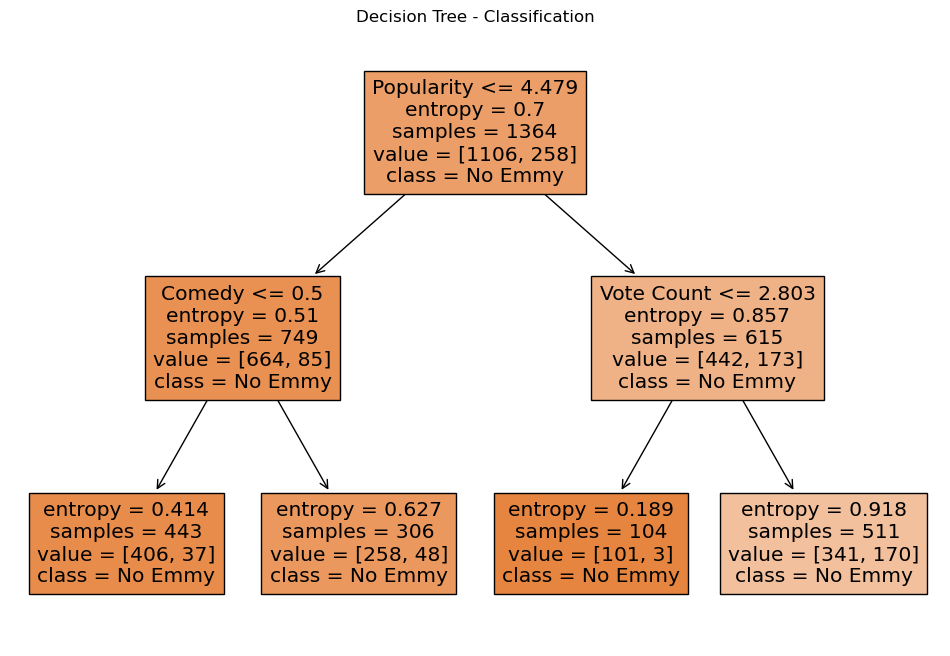

In [407]:
plt.figure(figsize=(12,8))
plot_tree(model, filled=True, feature_names= X.columns, class_names= ["No Emmy", "Ganador Emmy"])
plt.title("Decision Tree - Classification")
plt.show()

## RANDOM FOREST

### HYPERPARAMETER TUNING
GRID SEARCH

In [408]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [409]:
# seleccionamos las features y la Y
X = df_modelo[["Rating", "Popularity", "Vote Count", "Episode Duration", "Comedy", "Drama"]]
y = df_modelo["win"]

# equilibramos los datos
from imblearn.under_sampling import TomekLinks
tl = TomekLinks()
X_tl, y_tl = tl.fit_resample(X, y)
y_tl.value_counts()

# Define the model
model = RandomForestClassifier()

In [410]:
# Define the parameter grid. Check the docuementation of the model to know the sxact names of the hyperparameters
param_grid = {
   'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Create GridSearchCV
grid_search = GridSearchCV(
	estimator=model # Model you want to fit
	, param_grid=param_grid # Hyperparameters grid
	, cv=5 # Number of cross-validation folds
	, scoring='accuracy'  # Scoring method you will use to determine the best hyperparameters
	, verbose=1  # Print the results at each step
	)

# Perform Grid Search
grid_search.fit(X_tl, y_tl)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)
# no es la accuracy final del modelo, para ello tengo que hacer el testing set


Fitting 5 folds for each of 27 candidates, totalling 135 fits


Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 10}
Best Accuracy: 0.5147639381934799


In [411]:
# Split the dta
X_train, X_test, y_train, y_test = train_test_split(X_tl, y_tl, test_size=0.2, random_state=42)
best_model = RandomForestClassifier(n_estimators=grid_search.best_params_['n_estimators']
                                    , max_depth=grid_search.best_params_['max_depth']
                                    , min_samples_split=grid_search.best_params_['min_samples_split'])

# Accuracy of the best model on the test data
best_model.fit(X_train, y_train)

print("Accuracy of the best model on the test data:", best_model.score(X_test, y_test))

Accuracy of the best model on the test data: 0.7807017543859649


In [412]:
# let's try crossvalidation
# lanzamos una validación cruzada utilizando
cross_val_score(model, X_train, y_train, cv = 13) # estoy haciendo 13 grupos/bloques
# me da el R2 en array

array([0.81904762, 0.76190476, 0.79047619, 0.78095238, 0.78095238,
       0.82857143, 0.80952381, 0.82857143, 0.80952381, 0.82857143,
       0.79047619, 0.83809524, 0.82692308])

In [413]:
np.mean(cross_val_score(model, X_train, y_train, cv = 13))

0.8101296139757679

In [414]:
# que tipo de modelo es mejor
from sklearn.neighbors import KNeighborsRegressor
model1 = DecisionTreeClassifier(random_state=42)
model2= LogisticRegression()
model3= KNeighborsRegressor()

In [415]:
model_pipeline = [model1, model2, model3]
model_names = ["Decision Tree", "Logistic Regression", "KNN"]
scores = {}
i = 0
for model in model_pipeline: # goodness of fit y explanatory power = R2
    gof = np.mean(cross_val_score(model, X_train, y_train, cv = 13))
    scores[model_names[i]] = gof
    i+=1
print(scores)

{'Decision Tree': 0.7323964497041421, 'Logistic Regression': 0.8145322626091858, 'KNN': 0.024694291789102506}
